In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold



import xgboost
import os
import pandas as pd
import numpy as np
os.chdir("Desktop/ukbiobank/test_timeseries")

In [2]:
HLAF_data = pd.read_csv("HLAF_dataframe_84k.csv", index_col="id")
HLAF_data

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sed morning,percent time sed evening,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening
id,,,,,,,,,,,,,,,,,,,,,
1313669,14.560601,11.353175,2.664172,3.500000,33.818254,10.190476,1.607205,0.928571,55.434066,5.309524,...,10.283529,74.135012,0.000000,96.176046,82.647475,12.411087,20.120305,0.414863,2.782738,5.595983
1354616,6.885714,2.428571,0.922619,0.000000,16.746032,8.586735,1.994048,0.000000,86.632738,3.714286,...,18.691826,53.788514,2.306548,95.874162,73.688242,33.353428,13.753724,0.128932,3.006837,1.875248
1061117,8.523016,6.690476,1.071429,0.000000,11.058503,11.892857,1.071475,0.000000,72.283447,18.642857,...,15.461480,71.156882,6.547619,96.913580,80.267578,21.386954,13.231029,0.052910,2.098276,3.452815
1783466,7.660714,3.000000,0.238095,3.214286,6.125000,5.214286,2.306641,6.785714,21.336395,16.678571,...,13.453343,28.577822,4.390393,3.588682,10.785044,13.549068,6.623762,4.071774,5.699870,1.250528
1160953,13.734014,14.204762,0.744048,0.857143,3.142857,5.333333,0.000000,0.000000,72.833009,9.714286,...,14.211418,67.300356,15.464615,93.473532,79.220977,23.486069,4.390471,0.120861,0.238095,2.098587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168784,5.035714,2.285714,1.443001,0.000000,13.287415,12.428571,5.248918,1.714286,60.987446,12.571429,...,29.617605,88.690476,1.046176,95.228628,58.170996,0.829726,18.542569,0.397614,5.501443,5.194805
1135595,5.000000,5.785714,1.904762,0.571429,0.857143,7.130952,0.891591,0.428571,56.870708,9.035714,...,38.034448,57.304965,4.072948,95.169444,30.759878,16.980750,26.666667,1.441678,28.389058,20.466059
1191197,13.930612,19.372449,10.141608,0.000000,13.180556,9.826190,4.414827,0.000000,44.609099,31.285714,...,25.177010,45.855893,0.770512,96.084914,33.402749,13.348605,25.989171,0.087002,21.407747,20.283215


In [3]:
ukbb_baseline = pd.read_csv('ukbiobank_baseline-data_SC_v22.csv')
ukbb_baseline

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,9,11,28,30,31,47,51,55,85,87,103,105,111,121,141,143,147,245,253,279,394,397,414,415,422,448,457,458,486,487,501,503,540) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eid,@310.0,@340.0,@460.0,@461.0,@470.0,@471.0,@480.0,@481.0,@490.0,...,fib_alveolitis,ramiprilgroup,MEDICATION_GROUPS2,MEDICATION_GROUPS3,CM_medication,MEDGROUPS_SYSMIS,CMD_SEDATIVES,waistcm_lowhrisk_female,waistcm_lowrisk_male,lowwaistcm_bothmalefemale
0,1000015,1,1943,36,,32,,93,,97,...,,,,,,0,,,1,1
1,1000027,0,1943,25,,32,,90,,105,...,,,,,,0,,,,0
2,1000039,0,1940,24,,32,,75,,88,...,,,1,,,1,,1,,1
3,1000040,0,1946,20,,25,,82,,108,...,,,,,,0,,,,0
4,1000053,1,1948,36,,36,,84,,97,...,,,,,,0,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502640,6026607,1,1966,44,,44,,107,,108,...,,,,,,0,,,,0
502641,6026610,0,1947,16,,14,,81,,98,...,,,,,1,0,1,,,0
502642,6026622,0,1969,22,,24,,77,,96,...,,,1,,,1,,1,,1
502643,6026636,1,1944,28,,30,,112,,113,...,,,,,,0,,,,0


In [4]:
ukbb_baseline.set_index('eid', drop=True, inplace=True)
ukbb_baseline

,@310.0,@340.0,@460.0,@461.0,@470.0,@471.0,@480.0,@481.0,@490.0,@491.0,...,fib_alveolitis,ramiprilgroup,MEDICATION_GROUPS2,MEDICATION_GROUPS3,CM_medication,MEDGROUPS_SYSMIS,CMD_SEDATIVES,waistcm_lowhrisk_female,waistcm_lowrisk_male,lowwaistcm_bothmalefemale
eid,,,,,,,,,,,,,,,,,,,,,
1000015,1,1943,36,,32,,93,,97,,...,,,,,,0,,,1,1
1000027,0,1943,25,,32,,90,,105,,...,,,,,,0,,,,0
1000039,0,1940,24,,32,,75,,88,,...,,,1,,,1,,1,,1
1000040,0,1946,20,,25,,82,,108,,...,,,,,,0,,,,0
1000053,1,1948,36,,36,,84,,97,,...,,,,,,0,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026607,1,1966,44,,44,,107,,108,,...,,,,,,0,,,,0
6026610,0,1947,16,,14,,81,,98,,...,,,,,1,0,1,,,0
6026622,0,1969,22,,24,,77,,96,,...,,,1,,,1,,1,,1


In [5]:
selected_ukbb = ukbb_baseline[["@230990.0","@310.0","@340.0","@210000.0","@530.0","@1890.0","@201160.0","@201170.0","@10700.0","@11600.0","@8740.0","@8940.0","@9140.0","@480.0","HEALTHY_CVD_T2D1_T2D2"]]
selected_ukbb = selected_ukbb.rename(columns={'@230990.0': 'body_fat', '@310.0': 'sex', "@340.0":"year_of_birth", "@210000.0":"ethnicity","@530.0":"date of assessment centre","@1890.0":"Townsend deprivation","@201160.0":"smoking status","@201170.0":"alcohol drinker status","@10700.0":"Time spent watching TV","@11600.0":"sleep duration","@8740.0":"duration of walks","@8940.0":"duration of moderate activity","@9140.0":"duration of vigorous activity","@480.0":"Waist circumference"})
selected_ukbb

,body_fat,sex,year_of_birth,ethnicity,date of assessment centre,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2
eid,,,,,,,,,,,,,,,
1000015,26.2,1,1943,1001,04/11/2008,3.47322,1,2,3,6,35,30,,93,1
1000027,40.2,0,1943,1001,11/13/2007,-1.36771,0,2,4,7,20,15,15,90,
1000039,34.7,0,1940,1001,08/01/2009,-3.85071,0,2,2,8,45,20,,75,1
1000040,43.4,0,1946,1001,03/04/2008,0.848407,0,2,4,8,20,,,82,1
1000053,28.3,1,1948,1001,1/17/2008,-0.194389,0,2,3,8,30,40,40,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026607,30.4,1,1966,1001,8/17/2007,5.69253,2,2,3,6,-1,-1,,107,1
6026610,42.9,0,1947,1001,06/03/2010,-3.37524,0,2,3,6,60,60,,81,1
6026622,31.5,0,1969,1001,03/06/2010,-1.82647,2,2,4,7,60,60,45,77,0


In [6]:
selected_ukbb['date of assessment centre'] = pd.to_datetime(selected_ukbb['date of assessment centre'])
selected_ukbb['year of assessment']= selected_ukbb['date of assessment centre'].dt.year
selected_ukbb["age at assessment centre"] = selected_ukbb["year of assessment"] - selected_ukbb["year_of_birth"]


In [7]:
selected_ukbb = selected_ukbb.drop(["date of assessment centre", "year of assessment", "year_of_birth"], axis=1)
selected_ukbb

,body_fat,sex,ethnicity,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
eid,,,,,,,,,,,,,,
1000015,26.2,1,1001,3.47322,1,2,3,6,35,30,,93,1,65
1000027,40.2,0,1001,-1.36771,0,2,4,7,20,15,15,90,,64
1000039,34.7,0,1001,-3.85071,0,2,2,8,45,20,,75,1,69
1000040,43.4,0,1001,0.848407,0,2,4,8,20,,,82,1,62
1000053,28.3,1,1001,-0.194389,0,2,3,8,30,40,40,84,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026607,30.4,1,1001,5.69253,2,2,3,6,-1,-1,,107,1,41
6026610,42.9,0,1001,-3.37524,0,2,3,6,60,60,,81,1,63
6026622,31.5,0,1001,-1.82647,2,2,4,7,60,60,45,77,0,41


In [8]:
HLAF_data_ukbb = HLAF_data.merge(selected_ukbb, left_index=True, right_index=True, how='inner')
HLAF_data_ukbb

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
1000064,11.783450,9.473810,1.086310,0.000000,11.535516,11.690476,1.324405,0.000000,36.870522,6.285714,...,0,2,4,7,-1,-1,-1,95,,62
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,1,2,3,8,120,140,80,78,0,59
1000088,5.488095,7.714286,2.103533,10.357143,13.895250,13.112986,8.435327,11.574401,19.431279,22.206841,...,0,2,3,7,30,60,,75,0,70
1000132,12.083333,9.897619,4.910714,0.000000,16.761905,10.071429,2.217262,0.000000,60.968859,5.023810,...,1,2,4,9,20,30,,94,,59
1000176,8.639796,10.779592,2.318084,2.476190,11.957287,8.250000,3.687316,2.714286,62.841920,26.214286,...,2,2,0.5,8,30,20,,70,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026091,8.035714,5.714286,0.341763,2.000000,12.000000,9.322222,0.296195,1.714286,80.764456,54.666667,...,2,2,2,7,30,45,20,77,1,65
6026203,11.020408,4.071429,1.146066,1.285714,20.254592,16.855442,10.983586,0.000000,47.571637,2.000000,...,1,2,2,7,50,50,10,85,,55
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,0,2,0.5,7,30,60,50,74,0,61
6026398,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,6.974325,0.000000,36.942203,5.571429,...,1,2,4,8,50,60,,102,1,57


In [9]:
EHR_phenotypes = pd.read_csv("EHR_phenotypes.csv",index_col='eid')
EHR_phenotypes

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,disease,date,category
eid,,,
1000015,Appendicitis,2000-01-10,Procedure for Appendicitis
1000015,Coronary heart disease not otherwise specified,2001-04-27,Diagnosed (3)
1000015,Stable angina,2001-06-20,Stable angina (4)
1000015,Gastro-oesophageal reflux disease,2001-10-16,Diagnosis of Gastro-oesophageal reflux disease
1000015,Osteoarthritis (excl spine),2003-04-08,Diagnosis of Osteoarthritis (excl spine)
...,...,...,...
6026645,Chronic sinusitis,2013-02-26,Diagnosis of Chronic sinusitis
6026645,Urinary Incontinence,2013-12-10,Diagnosis of Urinary Incontinence
6026645,Asthma,2014-03-29,Diagnosis of Asthma


In [10]:
#Filter out individuals who have type-2 diabetes from phenotypes from EHR data
PD_t2d_population = EHR_phenotypes[EHR_phenotypes["category"] == "Type II diabetes mellitus (4)"]
PD_t2d_population


,disease,date,category
eid,,,
1000265,Diabetes,2015-09-04,Type II diabetes mellitus (4)
1000419,Diabetes,2011-08-01,Type II diabetes mellitus (4)
1000795,Diabetes,1999-01-01,Type II diabetes mellitus (4)
1001095,Diabetes,2016-01-26,Type II diabetes mellitus (4)
1001239,Diabetes,2013-12-17,Type II diabetes mellitus (4)
...,...,...,...
6025644,Diabetes,1996-06-28,Type II diabetes mellitus (4)
6025672,Diabetes,1993-11-01,Type II diabetes mellitus (4)
6025709,Diabetes,2002-01-04,Type II diabetes mellitus (4)


In [11]:
#Physical activity impact scores

activity_scores = pd.read_csv("gp_clinical_eid_activity_impact_score.csv")
activity_scores


,eid,activity_score
0,1000071,0.0
1,1000419,10.0
2,1000522,0.0
3,1000574,0.0
4,1000885,0.0
...,...,...
19847,6025994,0.0
19848,6026224,0.0
19849,6026398,0.0
19850,6026451,0.0


In [12]:
biobank_acc_ids = pd.read_csv("biobank-accelerometer-IDs.csv")
biobank_acc_ids

,id
0,1000071
1,1000088
2,1000132
3,1000176
4,1000180
...,...
103707,6026224
103708,6026398
103709,6026451
103710,6026622


In [13]:
SC_t2d_population = HLAF_data_ukbb[(HLAF_data_ukbb["HEALTHY_CVD_T2D1_T2D2"] == '2') | (HLAF_data_ukbb["HEALTHY_CVD_T2D1_T2D2"] == '3')]
SC_t2d_population

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
1004032,4.500000,4.666667,0.982399,0.000000,22.346939,15.958333,2.599263,0.000000,50.747100,11.357143,...,1,2,5,8,75,,,126,3,65
1004949,10.028571,6.976190,5.434783,1.857143,8.404762,12.229932,10.581189,5.214286,48.087771,17.500000,...,0,2,3,8,-1,30,-1,91,3,62
1006811,21.652721,17.990476,6.652452,1.857143,4.595238,8.166667,1.343284,0.000000,110.040476,5.321429,...,0,2,4,2,80,80,30,123,3,68
1011723,4.625000,8.595238,0.253240,1.428571,1.071429,2.785714,0.238266,0.857143,24.914683,99.857143,...,1,2,3,9,60,,10,115,3,61
1015274,16.371088,10.952381,4.989232,1.000000,15.841497,12.019728,4.720029,0.000000,67.912986,51.785714,...,1,2,3,7,60,,60,90,3,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013760,19.622789,14.928571,4.293157,6.928571,4.828571,1.142857,0.144300,0.000000,63.940945,17.035714,...,0,2,3,6,60,10,,108,2,64
6019959,14.226190,12.476190,1.617251,3.428571,9.392857,11.571429,1.264773,0.000000,83.727381,26.357143,...,1,2,2,5,15,,,128,3,57
6022001,6.464286,6.500000,1.847476,0.000000,10.459768,12.469048,4.253491,0.000000,45.530754,16.142857,...,1,2,4,7,60,60,,95,2,52
6023926,5.829365,7.761905,2.557545,0.000000,13.767972,9.291667,3.653752,0.000000,37.822535,6.761905,...,1,2,4,7,-1,,-1,106,3,61


In [14]:
new_t2d_population_ids = list(set().union(list(PD_t2d_population.index),list(SC_t2d_population.index)))
len(new_t2d_population_ids)

19065

In [15]:
matching_ids = []

for eid_1 in HLAF_data_ukbb.index:
    for eid_2 in new_t2d_population_ids:
        if eid_1 == eid_2:
            matching_ids.append(eid_1)
            
print(len(matching_ids))
matching_ids = pd.Series(matching_ids)
matching_ids.drop_duplicates(inplace=True)
print(len(matching_ids))

3153
3076


In [16]:
new_t2d_population = HLAF_data_ukbb.loc[matching_ids]
new_t2d_population.drop_duplicates(inplace=True)
new_t2d_population.drop('HEALTHY_CVD_T2D1_T2D2', axis=1)
new_t2d_population['t2d_status'] = 1
new_t2d_population

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,t2d_status
1000419,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,17.047619,...,2,2,7,45,60,30,97,1,53,1
1004032,4.500000,4.666667,0.982399,0.000000,22.346939,15.958333,2.599263,0.000000,50.747100,11.357143,...,2,5,8,75,,,126,3,65,1
1004801,11.585065,5.428571,2.336310,0.000000,10.259070,7.085714,1.011905,0.000000,44.913900,6.571429,...,1,3,8,60,45,,128,,54,1
1004949,10.028571,6.976190,5.434783,1.857143,8.404762,12.229932,10.581189,5.214286,48.087771,17.500000,...,2,3,8,-1,30,-1,91,3,62,1
1005787,8.401587,13.035374,10.168042,0.714286,7.083333,7.476190,3.674396,0.000000,64.288873,31.666667,...,2,0,8,90,30,10,81,0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,14.226190,12.476190,1.617251,3.428571,9.392857,11.571429,1.264773,0.000000,83.727381,26.357143,...,2,2,5,15,,,128,3,57,1
6022001,6.464286,6.500000,1.847476,0.000000,10.459768,12.469048,4.253491,0.000000,45.530754,16.142857,...,2,4,7,60,60,,95,2,52,1
6023926,5.829365,7.761905,2.557545,0.000000,13.767972,9.291667,3.653752,0.000000,37.822535,6.761905,...,2,4,7,-1,,-1,106,3,61,1
6024863,7.828571,8.057143,0.639881,5.071429,20.945115,23.545805,10.059524,11.928571,27.782967,8.500000,...,2,3,6,-1,-1,30,78,3,53,1


In [17]:
control_population = HLAF_data_ukbb
HLAF_data_ukbb

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
1000064,11.783450,9.473810,1.086310,0.000000,11.535516,11.690476,1.324405,0.000000,36.870522,6.285714,...,0,2,4,7,-1,-1,-1,95,,62
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,1,2,3,8,120,140,80,78,0,59
1000088,5.488095,7.714286,2.103533,10.357143,13.895250,13.112986,8.435327,11.574401,19.431279,22.206841,...,0,2,3,7,30,60,,75,0,70
1000132,12.083333,9.897619,4.910714,0.000000,16.761905,10.071429,2.217262,0.000000,60.968859,5.023810,...,1,2,4,9,20,30,,94,,59
1000176,8.639796,10.779592,2.318084,2.476190,11.957287,8.250000,3.687316,2.714286,62.841920,26.214286,...,2,2,0.5,8,30,20,,70,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026091,8.035714,5.714286,0.341763,2.000000,12.000000,9.322222,0.296195,1.714286,80.764456,54.666667,...,2,2,2,7,30,45,20,77,1,65
6026203,11.020408,4.071429,1.146066,1.285714,20.254592,16.855442,10.983586,0.000000,47.571637,2.000000,...,1,2,2,7,50,50,10,85,,55
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,0,2,0.5,7,30,60,50,74,0,61
6026398,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,6.974325,0.000000,36.942203,5.571429,...,1,2,4,8,50,60,,102,1,57


In [18]:
real_controls_ids = activity_scores[activity_scores['activity_score'] == 0]
real_controls_ids

,eid,activity_score
0,1000071,0.0
2,1000522,0.0
3,1000574,0.0
4,1000885,0.0
5,1001785,0.0
...,...,...
19846,6025431,0.0
19847,6025994,0.0
19848,6026224,0.0
19849,6026398,0.0


In [19]:
real_controls = control_population.merge(real_controls_ids,left_index=True,right_on='eid',how='inner')
real_controls

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,eid,activity_score
0,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,3,8,120,140,80,78,0,59,1000071,0.0
3,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,4.813187,0.000000,66.176304,8.142857,...,0,8,30,60,30,69,0,54,1000574,0.0
4,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,25.718962,9.642857,26.578231,9.000000,...,0,8,30,40,60,70,0,49,1000885,0.0
5,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,1.311953,5.000000,176.313605,16.642857,...,4,8,10,10,120,106,0,57,1001785,0.0
6,7.524150,10.968027,8.019675,3.285714,16.122449,8.280952,2.095808,0.142857,26.244841,14.142857,...,3,7,-1,120,60,73,0,59,1002274,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19846,13.980952,16.161905,8.058608,3.714286,2.857143,7.452381,3.439153,1.285714,76.559524,14.857143,...,1,7,30,,,95,0,46,6025431,0.0
19847,2.714286,3.857143,1.382488,0.000000,9.668707,8.550170,4.267682,2.214286,53.708081,10.321429,...,2,7,-1,-1,30,101,1,47,6025994,0.0
19848,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,0.5,7,30,60,50,74,0,61,6026224,0.0
19849,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,6.974325,0.000000,36.942203,5.571429,...,4,8,50,60,,102,1,57,6026398,0.0


In [20]:
real_controls.set_index("eid",drop=True,inplace=True)
real_controls

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,activity_score
eid,,,,,,,,,,,,,,,,,,,,,
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,2,3,8,120,140,80,78,0,59,0.0
1000574,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,4.813187,0.000000,66.176304,8.142857,...,2,0,8,30,60,30,69,0,54,0.0
1000885,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,25.718962,9.642857,26.578231,9.000000,...,2,0,8,30,40,60,70,0,49,0.0
1001785,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,1.311953,5.000000,176.313605,16.642857,...,2,4,8,10,10,120,106,0,57,0.0
1002274,7.524150,10.968027,8.019675,3.285714,16.122449,8.280952,2.095808,0.142857,26.244841,14.142857,...,2,3,7,-1,120,60,73,0,59,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,13.980952,16.161905,8.058608,3.714286,2.857143,7.452381,3.439153,1.285714,76.559524,14.857143,...,2,1,7,30,,,95,0,46,0.0
6025994,2.714286,3.857143,1.382488,0.000000,9.668707,8.550170,4.267682,2.214286,53.708081,10.321429,...,2,2,7,-1,-1,30,101,1,47,0.0
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,2,0.5,7,30,60,50,74,0,61,0.0


In [21]:
real_controls = real_controls.drop(["HEALTHY_CVD_T2D1_T2D2","activity_score"], axis=1)

In [22]:
real_controls

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre
eid,,,,,,,,,,,,,,,,,,,,,
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,-3.68553,1,2,3,8,120,140,80,78,59
1000574,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,4.813187,0.000000,66.176304,8.142857,...,-4.2727,0,2,0,8,30,60,30,69,54
1000885,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,25.718962,9.642857,26.578231,9.000000,...,0.285532,0,2,0,8,30,40,60,70,49
1001785,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,1.311953,5.000000,176.313605,16.642857,...,-1.62273,0,2,4,8,10,10,120,106,57
1002274,7.524150,10.968027,8.019675,3.285714,16.122449,8.280952,2.095808,0.142857,26.244841,14.142857,...,-4.33835,0,2,3,7,-1,120,60,73,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,13.980952,16.161905,8.058608,3.714286,2.857143,7.452381,3.439153,1.285714,76.559524,14.857143,...,-3.21497,1,2,1,7,30,,,95,46
6025994,2.714286,3.857143,1.382488,0.000000,9.668707,8.550170,4.267682,2.214286,53.708081,10.321429,...,-0.0813594,0,2,2,7,-1,-1,30,101,47
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,-0.353374,0,2,0.5,7,30,60,50,74,61


In [23]:
#Identify diabetics with no activity impairment
common_t2d_control = real_controls.merge(new_t2d_population,left_index=True,right_index=True,how='inner')
common_t2d_control

,avg bout length light tasks afternoon_x,avg bout length light tasks evening_x,avg bout length light tasks morning_x,avg bout length light tasks overnight_x,avg bout length mod afternoon_x,avg bout length mod evening_x,avg bout length mod morning_x,avg bout length mod overnight_x,avg bout length sed afternoon_x,avg bout length sed overnight_x,...,alcohol drinker status_y,Time spent watching TV_y,sleep duration_y,duration of walks_y,duration of moderate activity_y,duration of vigorous activity_y,Waist circumference_y,HEALTHY_CVD_T2D1_T2D2,age at assessment centre_y,t2d_status
1005787,8.401587,13.035374,10.168042,0.714286,7.083333,7.476190,3.674396,0.000000,64.288873,31.666667,...,2,0,8,90,30,10,81,0,64,1
1021133,14.860261,15.063095,9.370748,0.000000,17.377551,11.680952,1.394558,0.000000,55.326242,67.052381,...,2,5,7,,,,83,1,59,1
1023291,11.900000,14.209184,1.990712,3.000000,16.787245,11.423129,1.190476,1.857143,44.921660,13.142857,...,2,3,6,50,15,10,114,3,63,1
1057888,11.917857,15.919048,1.462585,0.285714,6.928571,6.357143,1.326531,0.000000,81.776304,28.642857,...,2,7,5,60,10,,129,3,51,1
1062485,17.150340,12.259301,4.848410,0.714286,11.762755,7.396032,2.639791,1.142857,39.954082,17.214286,...,2,2,6,30,30,,87,0,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977332,7.238095,11.304762,1.938426,0.000000,8.928571,5.500000,0.602704,1.000000,56.453313,82.000000,...,2,3,6,90,15,,100,1,60,1
5977546,10.612245,9.071429,1.279934,0.000000,12.498073,11.943878,4.417836,0.000000,41.334323,11.857143,...,2,2,7,15,15,10,122,3,55,1
5983649,13.354762,9.161905,3.148068,0.000000,11.435714,6.404762,0.955276,0.000000,63.942063,7.428571,...,2,8,8,60,30,30,115,3,56,1
5995973,9.292517,6.799660,6.407278,1.428571,13.967647,12.219728,3.523035,0.000000,37.395346,9.785714,...,2,1,8,30,60,-1,61,3,60,1


In [24]:
#Drop T2D individuals with no activity impairment from control population
real_controls.drop(common_t2d_control.index,axis=0,inplace=True)
real_controls

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre
eid,,,,,,,,,,,,,,,,,,,,,
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,-3.68553,1,2,3,8,120,140,80,78,59
1000574,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,4.813187,0.000000,66.176304,8.142857,...,-4.2727,0,2,0,8,30,60,30,69,54
1000885,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,25.718962,9.642857,26.578231,9.000000,...,0.285532,0,2,0,8,30,40,60,70,49
1001785,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,1.311953,5.000000,176.313605,16.642857,...,-1.62273,0,2,4,8,10,10,120,106,57
1002274,7.524150,10.968027,8.019675,3.285714,16.122449,8.280952,2.095808,0.142857,26.244841,14.142857,...,-4.33835,0,2,3,7,-1,120,60,73,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,13.980952,16.161905,8.058608,3.714286,2.857143,7.452381,3.439153,1.285714,76.559524,14.857143,...,-3.21497,1,2,1,7,30,,,95,46
6025994,2.714286,3.857143,1.382488,0.000000,9.668707,8.550170,4.267682,2.214286,53.708081,10.321429,...,-0.0813594,0,2,2,7,-1,-1,30,101,47
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,-0.353374,0,2,0.5,7,30,60,50,74,61


In [25]:
real_controls['t2d_status'] = 0
real_controls

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,1,2,3,8,120,140,80,78,59,0
1000574,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,4.813187,0.000000,66.176304,8.142857,...,0,2,0,8,30,60,30,69,54,0
1000885,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,25.718962,9.642857,26.578231,9.000000,...,0,2,0,8,30,40,60,70,49,0
1001785,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,1.311953,5.000000,176.313605,16.642857,...,0,2,4,8,10,10,120,106,57,0
1002274,7.524150,10.968027,8.019675,3.285714,16.122449,8.280952,2.095808,0.142857,26.244841,14.142857,...,0,2,3,7,-1,120,60,73,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,13.980952,16.161905,8.058608,3.714286,2.857143,7.452381,3.439153,1.285714,76.559524,14.857143,...,1,2,1,7,30,,,95,46,0
6025994,2.714286,3.857143,1.382488,0.000000,9.668707,8.550170,4.267682,2.214286,53.708081,10.321429,...,0,2,2,7,-1,-1,30,101,47,0
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,0,2,0.5,7,30,60,50,74,61,0


In [26]:
new_ground_truth = real_controls.append(new_t2d_population)
new_ground_truth = new_ground_truth.drop("HEALTHY_CVD_T2D1_T2D2",axis=1)
new_ground_truth

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,alcohol drinker status,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,...,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,sex,sleep duration,smoking status,t2d_status
1000071,3,-3.68553,78,59,2,5.630952,4.452381,1.158012,0.000000,19.208844,...,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,0,8,1,0
1000574,0,-4.2727,69,54,2,14.390306,19.248701,7.912088,0.142857,20.985714,...,15.450549,96.770721,18.285714,19.648352,16.109890,0.399815,0,8,0,0
1000885,0,0.285532,70,49,2,6.666667,7.005102,6.008885,2.000000,20.790476,...,8.487257,95.069653,39.490297,19.195698,15.595043,1.543294,0,8,0,0
1001785,4,-1.62273,106,57,2,9.492063,7.226190,3.810912,5.857143,5.757143,...,26.114119,95.528102,12.619742,9.766764,4.643898,0.261006,1,8,0,0
1002274,3,-4.33835,73,59,2,7.524150,10.968027,8.019675,3.285714,16.122449,...,17.814371,96.158875,49.657827,34.751925,20.701454,0.898987,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,2,0.975673,128,57,2,14.226190,12.476190,1.617251,3.428571,9.392857,...,35.931993,83.811872,9.910844,3.130831,1.741655,0.193764,1,5,1,1
6022001,4,-3.50665,95,52,2,6.464286,6.500000,1.847476,0.000000,10.459768,...,23.566058,96.089205,21.718582,9.022556,12.910849,0.000000,1,7,1,1
6023926,4,-1.39447,106,61,2,5.829365,7.761905,2.557545,0.000000,13.767972,...,52.116231,94.462279,37.547372,18.324806,13.738254,0.561798,1,7,1,1
6024863,3,0.856013,78,53,2,7.828571,8.057143,0.639881,5.071429,20.945115,...,58.424155,69.179083,31.565464,9.583333,10.968348,1.694420,0,6,0,1


In [34]:
new_ground_truth = new_ground_truth.replace(" ",np.nan,)
new_ground_truth

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,alcohol drinker status,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,...,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,sex,sleep duration,smoking status,t2d_status
1000071,3,-3.68553,78,59,2,5.630952,4.452381,1.158012,0.000000,19.208844,...,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,0,8,1,0
1000574,0,-4.2727,69,54,2,14.390306,19.248701,7.912088,0.142857,20.985714,...,15.450549,96.770721,18.285714,19.648352,16.109890,0.399815,0,8,0,0
1000885,0,0.285532,70,49,2,6.666667,7.005102,6.008885,2.000000,20.790476,...,8.487257,95.069653,39.490297,19.195698,15.595043,1.543294,0,8,0,0
1001785,4,-1.62273,106,57,2,9.492063,7.226190,3.810912,5.857143,5.757143,...,26.114119,95.528102,12.619742,9.766764,4.643898,0.261006,1,8,0,0
1002274,3,-4.33835,73,59,2,7.524150,10.968027,8.019675,3.285714,16.122449,...,17.814371,96.158875,49.657827,34.751925,20.701454,0.898987,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,2,0.975673,128,57,2,14.226190,12.476190,1.617251,3.428571,9.392857,...,35.931993,83.811872,9.910844,3.130831,1.741655,0.193764,1,5,1,1
6022001,4,-3.50665,95,52,2,6.464286,6.500000,1.847476,0.000000,10.459768,...,23.566058,96.089205,21.718582,9.022556,12.910849,0.000000,1,7,1,1
6023926,4,-1.39447,106,61,2,5.829365,7.761905,2.557545,0.000000,13.767972,...,52.116231,94.462279,37.547372,18.324806,13.738254,0.561798,1,7,1,1
6024863,3,0.856013,78,53,2,7.828571,8.057143,0.639881,5.071429,20.945115,...,58.424155,69.179083,31.565464,9.583333,10.968348,1.694420,0,6,0,1


In [35]:
percent_missing = new_ground_truth.isnull().sum() * 100 / len(new_ground_truth)
missing_value_df = pd.DataFrame({'column_name': new_ground_truth.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.to_csv("84k_missing_percentages.csv")
missing_value_df

,column_name,percent_missing
duration of vigorous activity,duration of vigorous activity,38.336504
duration of moderate activity,duration of moderate activity,16.418814
duration of walks,duration of walks,3.501643
body_fat,body_fat,1.392011
ethnicity,ethnicity,0.371779
...,...,...
avg number bout light tasks afternoon,avg number bout light tasks afternoon,0.000000
avg bout length walking overnight,avg bout length walking overnight,0.000000
avg bout length walking morning,avg bout length walking morning,0.000000
avg bout length walking evening,avg bout length walking evening,0.000000


In [36]:
new_ground_truth.to_csv("HLAF_UKBB_12K.csv",index=True)

In [37]:
###############  PREPROCESSING STEPS OF NEW GROUND TRUTH DATA     ###################
#MISSING DATA IMPUTATION
#Impute missing categorical values with mode value
categorical_cols = ["sex","ethnicity","smoking status","alcohol drinker status"]
ukbb_vars_categorical = new_ground_truth[categorical_cols]
ukbb_vars_categorical.set_index(new_ground_truth.index,inplace=True)

for column in ukbb_vars_categorical.columns:
    ukbb_vars_categorical[column].fillna(ukbb_vars_categorical[column].mode()[0], inplace=True)

ukbb_vars_categorical

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,sex,ethnicity,smoking status,alcohol drinker status
1000071,0,1001,1,2
1000574,0,1001,0,2
1000885,0,1003,0,2
1001785,1,1001,0,2
1002274,0,1001,0,2
...,...,...,...,...
6019959,1,1001,1,2
6022001,1,1001,1,2
6023926,1,1001,1,2
6024863,0,5,0,2


In [38]:
#Uses KNN to impute continuous values
from sklearn.impute import KNNImputer

imputed_hlaf_t2d = new_ground_truth
imputed_hlaf_t2d = imputed_hlaf_t2d.drop(["sex","ethnicity","smoking status","alcohol drinker status"],axis=1)
imputer = KNNImputer(n_neighbors=3, weights="distance",metric="nan_euclidean")
imputed_hlaf_t2d


,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,sleep duration,t2d_status
1000071,3,-3.68553,78,59,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,...,2.228047,2.317328,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,8,0
1000574,0,-4.2727,69,54,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,...,0.197802,0.000000,15.450549,96.770721,18.285714,19.648352,16.109890,0.399815,8,0
1000885,0,0.285532,70,49,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,...,0.000000,2.010755,8.487257,95.069653,39.490297,19.195698,15.595043,1.543294,8,0
1001785,4,-1.62273,106,57,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,...,0.895460,13.098709,26.114119,95.528102,12.619742,9.766764,4.643898,0.261006,8,0
1002274,3,-4.33835,73,59,7.524150,10.968027,8.019675,3.285714,16.122449,8.280952,...,0.000000,3.378956,17.814371,96.158875,49.657827,34.751925,20.701454,0.898987,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,2,0.975673,128,57,14.226190,12.476190,1.617251,3.428571,9.392857,11.571429,...,7.215426,1.928260,35.931993,83.811872,9.910844,3.130831,1.741655,0.193764,5,1
6022001,4,-3.50665,95,52,6.464286,6.500000,1.847476,0.000000,10.459768,12.469048,...,1.976369,5.026853,23.566058,96.089205,21.718582,9.022556,12.910849,0.000000,7,1
6023926,4,-1.39447,106,61,5.829365,7.761905,2.557545,0.000000,13.767972,9.291667,...,1.425035,1.864383,52.116231,94.462279,37.547372,18.324806,13.738254,0.561798,7,1
6024863,3,0.856013,78,53,7.828571,8.057143,0.639881,5.071429,20.945115,23.545805,...,5.491459,18.454010,58.424155,69.179083,31.565464,9.583333,10.968348,1.694420,6,1


In [42]:
imputed= imputer.fit_transform(imputed_hlaf_t2d)
imputed_hlaf_t2d = pd.DataFrame(imputed, columns=imputed_hlaf_t2d.columns,index=new_ground_truth.index)
imputed_hlaf_t2d

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,sleep duration,t2d_status
1000071,3.0,-3.685530,78.0,59.0,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,...,2.228047,2.317328,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,8.0,0.0
1000574,0.0,-4.272700,69.0,54.0,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,...,0.197802,0.000000,15.450549,96.770721,18.285714,19.648352,16.109890,0.399815,8.0,0.0
1000885,0.0,0.285532,70.0,49.0,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,...,0.000000,2.010755,8.487257,95.069653,39.490297,19.195698,15.595043,1.543294,8.0,0.0
1001785,4.0,-1.622730,106.0,57.0,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,...,0.895460,13.098709,26.114119,95.528102,12.619742,9.766764,4.643898,0.261006,8.0,0.0
1002274,3.0,-4.338350,73.0,59.0,7.524150,10.968027,8.019675,3.285714,16.122449,8.280952,...,0.000000,3.378956,17.814371,96.158875,49.657827,34.751925,20.701454,0.898987,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,2.0,0.975673,128.0,57.0,14.226190,12.476190,1.617251,3.428571,9.392857,11.571429,...,7.215426,1.928260,35.931993,83.811872,9.910844,3.130831,1.741655,0.193764,5.0,1.0
6022001,4.0,-3.506650,95.0,52.0,6.464286,6.500000,1.847476,0.000000,10.459768,12.469048,...,1.976369,5.026853,23.566058,96.089205,21.718582,9.022556,12.910849,0.000000,7.0,1.0
6023926,4.0,-1.394470,106.0,61.0,5.829365,7.761905,2.557545,0.000000,13.767972,9.291667,...,1.425035,1.864383,52.116231,94.462279,37.547372,18.324806,13.738254,0.561798,7.0,1.0
6024863,3.0,0.856013,78.0,53.0,7.828571,8.057143,0.639881,5.071429,20.945115,23.545805,...,5.491459,18.454010,58.424155,69.179083,31.565464,9.583333,10.968348,1.694420,6.0,1.0


In [45]:
ukbb_vars_categorical.set_index(new_ground_truth.index,inplace=True)
ukbb_vars_categorical

,sex,ethnicity,smoking status,alcohol drinker status
1000071,0,1001,1,2
1000574,0,1001,0,2
1000885,0,1003,0,2
1001785,1,1001,0,2
1002274,0,1001,0,2
...,...,...,...,...
6019959,1,1001,1,2
6022001,1,1001,1,2
6023926,1,1001,1,2
6024863,0,5,0,2


In [46]:
imputed_hlaf_t2d = imputed_hlaf_t2d.merge(ukbb_vars_categorical,left_index=True, right_index=True, how='inner')
imputed_hlaf_t2d.drop_duplicates(inplace=True)

imputed_hlaf_t2d

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,sleep duration,t2d_status,sex,ethnicity,smoking status,alcohol drinker status
1000071,3.0,-3.685530,78.0,59.0,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,...,24.450414,17.587744,12.543712,0.000000,8.0,0.0,0,1001,1,2
1000419,2.0,-1.118930,97.0,53.0,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,...,19.306067,11.203722,5.873231,0.835297,7.0,1.0,1,1001,1,2
1000574,0.0,-4.272700,69.0,54.0,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,...,18.285714,19.648352,16.109890,0.399815,8.0,0.0,0,1001,0,2
1000885,0.0,0.285532,70.0,49.0,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,...,39.490297,19.195698,15.595043,1.543294,8.0,0.0,0,1003,0,2
1001785,4.0,-1.622730,106.0,57.0,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,...,12.619742,9.766764,4.643898,0.261006,8.0,0.0,1,1001,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,1.0,-3.214970,95.0,46.0,13.980952,16.161905,8.058608,3.714286,2.857143,7.452381,...,15.506716,20.492470,17.114367,0.444115,7.0,0.0,0,1001,1,2
6025994,2.0,-0.081359,101.0,47.0,2.714286,3.857143,1.382488,0.000000,9.668707,8.550170,...,24.744540,22.921258,12.783009,0.289575,7.0,0.0,0,1001,0,2
6026224,0.5,-0.353374,74.0,61.0,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,...,21.636616,9.807807,14.979196,0.459540,7.0,0.0,0,1001,0,2
6026398,4.0,-3.306900,102.0,57.0,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,...,27.317750,16.482664,14.569319,0.288600,8.0,0.0,0,1001,1,2


In [47]:
percent_missing = imputed_hlaf_t2d.isnull().sum() * 100 / len(imputed_hlaf_t2d)
missing_value_df_2 = pd.DataFrame({'column_name': imputed_hlaf_t2d.columns,'percent_missing': percent_missing})
missing_value_df_2.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df_2

,column_name,percent_missing
Time spent watching TV,Time spent watching TV,0.0
percent time mod overnight,percent time mod overnight,0.0
percent time mod evening,percent time mod evening,0.0
percent time mod afternoon,percent time mod afternoon,0.0
percent time light tasks overnight,percent time light tasks overnight,0.0
...,...,...
avg number bout light tasks afternoon,avg number bout light tasks afternoon,0.0
avg bout length walking overnight,avg bout length walking overnight,0.0
avg bout length walking morning,avg bout length walking morning,0.0
avg bout length walking evening,avg bout length walking evening,0.0


In [103]:
#ONE HOT ENCODING OF CATEGORICAL FEATURES
categorical_cols = ["sex","ethnicity","smoking status","alcohol drinker status"]
ukbb_vars_categorical = imputed_hlaf_t2d[categorical_cols]
for col in ukbb_vars_categorical.columns:
    ukbb_vars_categorical[col] = ukbb_vars_categorical[col].astype(str)
ukbb_vars_categorical_encoded = pd.get_dummies(ukbb_vars_categorical, prefix_sep="_", columns=categorical_cols)
ukbb_vars_categorical_encoded

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,sex_0,sex_1,ethnicity_1,ethnicity_1001,ethnicity_1002,ethnicity_1003,ethnicity_2,ethnicity_2001,ethnicity_2002,ethnicity_2003,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
1000071,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000419,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000574,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1000885,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1001785,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6025994,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6026224,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6026398,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [106]:
#FEATURE SCALING
imputed_hlaf_t2d["body_fat"] = pd.to_numeric(imputed_hlaf_t2d["body_fat"])
imputed_hlaf_t2d["Townsend deprivation"] = pd.to_numeric(imputed_hlaf_t2d["Townsend deprivation"])
imputed_hlaf_t2d["Time spent watching TV"] = pd.to_numeric(imputed_hlaf_t2d["Time spent watching TV"])
imputed_hlaf_t2d["sleep duration"] = pd.to_numeric(imputed_hlaf_t2d["sleep duration"])
imputed_hlaf_t2d["duration of walks"] = pd.to_numeric(imputed_hlaf_t2d["duration of walks"])
imputed_hlaf_t2d["duration of moderate activity"] = pd.to_numeric(imputed_hlaf_t2d["duration of moderate activity"])
imputed_hlaf_t2d["duration of vigorous activity"] = pd.to_numeric(imputed_hlaf_t2d["duration of vigorous activity"])
imputed_hlaf_t2d["Waist circumference"] = pd.to_numeric(imputed_hlaf_t2d["Waist circumference"])
unscaled_imputed_t2d_controls = imputed_hlaf_t2d.drop(categorical_cols, axis=1)
unscaled_imputed_t2d_controls

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,sleep duration,t2d_status
1000071,3.0,-3.685530,78.0,59.0,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,...,2.228047,2.317328,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,8.0,0.0
1000419,2.0,-1.118930,97.0,53.0,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,...,0.930413,7.520837,41.480907,93.767402,19.306067,11.203722,5.873231,0.835297,7.0,1.0
1000574,0.0,-4.272700,69.0,54.0,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,...,0.197802,0.000000,15.450549,96.770721,18.285714,19.648352,16.109890,0.399815,8.0,0.0
1000885,0.0,0.285532,70.0,49.0,6.666667,7.005102,6.008885,2.000000,20.790476,15.154607,...,0.000000,2.010755,8.487257,95.069653,39.490297,19.195698,15.595043,1.543294,8.0,0.0
1001785,4.0,-1.622730,106.0,57.0,9.492063,7.226190,3.810912,5.857143,5.757143,7.023810,...,0.895460,13.098709,26.114119,95.528102,12.619742,9.766764,4.643898,0.261006,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,1.0,-3.214970,95.0,46.0,13.980952,16.161905,8.058608,3.714286,2.857143,7.452381,...,5.494505,2.401302,29.955230,94.948187,15.506716,20.492470,17.114367,0.444115,7.0,0.0
6025994,2.0,-0.081359,101.0,47.0,2.714286,3.857143,1.382488,0.000000,9.668707,8.550170,...,0.120216,6.331397,34.121419,95.810811,24.744540,22.921258,12.783009,0.289575,7.0,0.0
6026224,0.5,-0.353374,74.0,61.0,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,...,0.970874,4.596790,35.644938,82.397602,21.636616,9.807807,14.979196,0.459540,7.0,0.0
6026398,4.0,-3.306900,102.0,57.0,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,...,2.156301,1.968873,42.510915,98.340548,27.317750,16.482664,14.569319,0.288600,8.0,0.0


In [107]:
scaler = StandardScaler()
scaled_imputed_t2d_controls = unscaled_imputed_t2d_controls
scaled_imputed_t2d_controls = pd.DataFrame(scaler.fit_transform(unscaled_imputed_t2d_controls),columns=unscaled_imputed_t2d_controls.columns,index=unscaled_imputed_t2d_controls.index)
scaled_imputed_t2d_controls.drop_duplicates(inplace=True)
scaled_imputed_t2d_controls

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,sleep duration,t2d_status
1000071,0.217081,-0.709243,-0.948004,0.231938,-1.090475,-1.111983,-0.914234,-0.699674,1.277832,0.983671,...,-0.331105,-0.709702,-0.371632,0.677071,0.469240,0.880415,0.425196,-0.417992,0.819653,-0.609385
1000419,-0.416233,0.203814,0.345067,-0.547506,0.076302,0.375667,0.063632,0.719870,-0.843267,-0.622176,...,-0.546620,-0.402197,0.165940,0.449702,-0.074558,-0.004001,-0.644532,-0.165038,-0.163301,1.640999
1000574,-1.682861,-0.918126,-1.560512,-0.417599,0.839477,1.795230,0.646901,-0.655313,1.577195,1.675024,...,-0.668294,-0.846646,-1.328309,0.574538,-0.182418,1.165883,0.997095,-0.296915,0.819653,-0.609385
1000885,-1.682861,0.703446,-1.492455,-1.067135,-0.862276,-0.610419,0.206995,-0.078623,1.544301,0.606399,...,-0.701146,-0.727819,-1.728031,0.503832,2.059073,1.103174,0.914530,0.049365,0.819653,-0.609385
1001785,0.850394,0.024589,0.957575,-0.027877,-0.239755,-0.566979,-0.301043,1.119117,-0.988479,-0.766953,...,-0.552425,-0.072568,-0.716177,0.522888,-0.781355,-0.203071,-0.841677,-0.338951,0.819653,-0.609385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,-1.049547,-0.541843,0.208954,-1.456857,0.749284,1.188729,0.680768,0.453706,-1.477064,-0.694564,...,0.211397,-0.704739,-0.495681,0.498783,-0.476180,1.282824,1.158181,-0.283500,-0.163301,-0.609385
6025994,-0.416233,0.572925,0.617293,-1.326950,-1.733106,-1.228937,-0.862349,-0.699674,-0.329468,-0.509140,...,-0.681180,-0.472487,-0.256525,0.534639,0.500331,1.619298,0.463572,-0.330300,-0.163301,-0.609385
6026224,-1.366204,0.476157,-1.220230,0.491752,-0.442599,-0.817260,-0.742241,-0.699674,0.920861,1.166827,...,-0.539900,-0.574995,-0.169069,-0.022895,0.171799,-0.197385,0.815769,-0.278829,-0.163301,-0.609385
6026398,0.850394,-0.574547,0.685349,-0.027877,0.263246,-0.814921,-0.826450,-0.344788,1.171229,-0.027753,...,-0.343021,-0.730294,0.225067,0.639790,0.772340,0.727322,0.750038,-0.330595,0.819653,-0.609385


In [108]:
ukbb_vars_categorical_encoded
scaled_imputed_t2d_controls = scaled_imputed_t2d_controls.merge(ukbb_vars_categorical_encoded, left_index=True, right_index=True,how="inner")
scaled_imputed_t2d_controls.drop_duplicates(inplace=True)
scaled_imputed_t2d_controls.drop('t2d_status',axis=1,inplace=True)
scaled_imputed_t2d_controls['t2d_status'] = unscaled_imputed_t2d_controls['t2d_status']
scaled_imputed_t2d_controls

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2,t2d_status
1000071,0.217081,-0.709243,-0.948004,0.231938,-1.090475,-1.111983,-0.914234,-0.699674,1.277832,0.983671,...,0,0,0,0,1,0,0,0,1,0.0
1000419,-0.416233,0.203814,0.345067,-0.547506,0.076302,0.375667,0.063632,0.719870,-0.843267,-0.622176,...,0,0,0,0,1,0,0,0,1,1.0
1000574,-1.682861,-0.918126,-1.560512,-0.417599,0.839477,1.795230,0.646901,-0.655313,1.577195,1.675024,...,0,0,0,1,0,0,0,0,1,0.0
1000885,-1.682861,0.703446,-1.492455,-1.067135,-0.862276,-0.610419,0.206995,-0.078623,1.544301,0.606399,...,0,0,0,1,0,0,0,0,1,0.0
1001785,0.850394,0.024589,0.957575,-0.027877,-0.239755,-0.566979,-0.301043,1.119117,-0.988479,-0.766953,...,0,0,0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,-1.049547,-0.541843,0.208954,-1.456857,0.749284,1.188729,0.680768,0.453706,-1.477064,-0.694564,...,0,0,0,0,1,0,0,0,1,0.0
6025994,-0.416233,0.572925,0.617293,-1.326950,-1.733106,-1.228937,-0.862349,-0.699674,-0.329468,-0.509140,...,0,0,0,1,0,0,0,0,1,0.0
6026224,-1.366204,0.476157,-1.220230,0.491752,-0.442599,-0.817260,-0.742241,-0.699674,0.920861,1.166827,...,0,0,0,1,0,0,0,0,1,0.0
6026398,0.850394,-0.574547,0.685349,-0.027877,0.263246,-0.814921,-0.826450,-0.344788,1.171229,-0.027753,...,0,0,0,0,1,0,0,0,1,0.0


In [109]:
scaled_imputed_t2d_controls['t2d_status'].value_counts()

0.0    8356
1.0    3103
Name: t2d_status, dtype: int64

In [110]:
X = scaled_imputed_t2d_controls.drop("t2d_status", axis=1)
X

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
1000071,0.217081,-0.709243,-0.948004,0.231938,-1.090475,-1.111983,-0.914234,-0.699674,1.277832,0.983671,...,0,0,0,0,0,1,0,0,0,1
1000419,-0.416233,0.203814,0.345067,-0.547506,0.076302,0.375667,0.063632,0.719870,-0.843267,-0.622176,...,0,0,0,0,0,1,0,0,0,1
1000574,-1.682861,-0.918126,-1.560512,-0.417599,0.839477,1.795230,0.646901,-0.655313,1.577195,1.675024,...,0,0,0,0,1,0,0,0,0,1
1000885,-1.682861,0.703446,-1.492455,-1.067135,-0.862276,-0.610419,0.206995,-0.078623,1.544301,0.606399,...,0,0,0,0,1,0,0,0,0,1
1001785,0.850394,0.024589,0.957575,-0.027877,-0.239755,-0.566979,-0.301043,1.119117,-0.988479,-0.766953,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,-1.049547,-0.541843,0.208954,-1.456857,0.749284,1.188729,0.680768,0.453706,-1.477064,-0.694564,...,0,0,0,0,0,1,0,0,0,1
6025994,-0.416233,0.572925,0.617293,-1.326950,-1.733106,-1.228937,-0.862349,-0.699674,-0.329468,-0.509140,...,0,0,0,0,1,0,0,0,0,1
6026224,-1.366204,0.476157,-1.220230,0.491752,-0.442599,-0.817260,-0.742241,-0.699674,0.920861,1.166827,...,0,0,0,0,1,0,0,0,0,1
6026398,0.850394,-0.574547,0.685349,-0.027877,0.263246,-0.814921,-0.826450,-0.344788,1.171229,-0.027753,...,0,0,0,0,0,1,0,0,0,1


In [111]:
y =scaled_imputed_t2d_controls['t2d_status']
y

1000071    0.0
1000419    1.0
1000574    0.0
1000885    0.0
1001785    0.0
          ... 
6025431    0.0
6025994    0.0
6026224    0.0
6026398    0.0
6026451    0.0
Name: t2d_status, Length: 11459, dtype: float64

# T2D Prediction using HLAF + SDL features with half of controls

In [112]:
half_controls = scaled_imputed_t2d_controls[scaled_imputed_t2d_controls['t2d_status'] == 0]
half_controls = half_controls.sample(frac=0.5)
half_controls

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2,t2d_status
4479028,1.483708,0.755196,0.685349,-0.547506,-0.632503,0.042984,-0.554435,-0.433510,-0.272965,-0.497305,...,0,0,0,1,0,0,0,0,1,0.0
1260022,-1.049547,-0.532149,-0.471609,-1.456857,-0.583014,0.480330,0.036017,-0.699674,-1.079938,-0.856003,...,0,0,0,1,0,0,0,0,1,0.0
2010768,0.217081,0.116301,0.277011,-0.547506,0.070946,1.000200,3.065609,3.455451,0.017172,-0.839342,...,0,0,0,1,0,0,0,0,1,0.0
4428288,-0.416233,-0.366724,-0.403553,-0.287692,-1.072115,-0.007941,-0.496756,-0.433510,-0.407747,1.437893,...,0,0,0,1,0,0,0,0,1,0.0
1613031,-1.682861,-0.403743,-1.220230,-1.456857,0.557632,-0.396695,0.536034,0.453706,0.507362,-0.233420,...,0,0,0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802741,-0.416233,-0.427137,0.072842,0.102030,0.450221,0.403892,0.258192,-0.344480,-1.284518,0.781591,...,0,0,0,1,0,0,0,0,1,0.0
5754005,0.217081,1.332887,0.549236,0.491752,0.702782,0.913788,-0.614975,1.828890,0.003075,-1.012271,...,0,0,0,0,0,1,0,0,1,0.0
1956881,0.217081,0.606972,0.208954,-0.417599,0.390810,-0.141814,-0.381413,-0.699674,1.299644,0.993048,...,0,0,0,1,0,0,0,0,1,0.0
2792740,-1.049547,-0.724124,0.345067,-1.716672,-0.444348,-0.688277,0.812090,2.150505,0.218600,0.780271,...,0,0,0,1,0,0,0,0,1,0.0


,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,t2d_status
1000419,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,17.047619,...,2,2,7,45,60,30,97,1,53,1
1004032,4.500000,4.666667,0.982399,0.000000,22.346939,15.958333,2.599263,0.000000,50.747100,11.357143,...,2,5,8,75,,,126,3,65,1
1004801,11.585065,5.428571,2.336310,0.000000,10.259070,7.085714,1.011905,0.000000,44.913900,6.571429,...,1,3,8,60,45,,128,,54,1
1004949,10.028571,6.976190,5.434783,1.857143,8.404762,12.229932,10.581189,5.214286,48.087771,17.500000,...,2,3,8,-1,30,-1,91,3,62,1
1005787,8.401587,13.035374,10.168042,0.714286,7.083333,7.476190,3.674396,0.000000,64.288873,31.666667,...,2,0,8,90,30,10,81,0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,14.226190,12.476190,1.617251,3.428571,9.392857,11.571429,1.264773,0.000000,83.727381,26.357143,...,2,2,5,15,,,128,3,57,1
6022001,6.464286,6.500000,1.847476,0.000000,10.459768,12.469048,4.253491,0.000000,45.530754,16.142857,...,2,4,7,60,60,,95,2,52,1
6023926,5.829365,7.761905,2.557545,0.000000,13.767972,9.291667,3.653752,0.000000,37.822535,6.761905,...,2,4,7,-1,,-1,106,3,61,1
6024863,7.828571,8.057143,0.639881,5.071429,20.945115,23.545805,10.059524,11.928571,27.782967,8.500000,...,2,3,6,-1,-1,30,78,3,53,1


In [114]:
t2d_half_controls = half_controls.append(scaled_imputed_t2d_controls[scaled_imputed_t2d_controls['t2d_status'] == 1])
t2d_half_controls

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2,t2d_status
4479028,1.483708,0.755196,0.685349,-0.547506,-0.632503,0.042984,-0.554435,-0.433510,-0.272965,-0.497305,...,0,0,0,1,0,0,0,0,1,0.0
1260022,-1.049547,-0.532149,-0.471609,-1.456857,-0.583014,0.480330,0.036017,-0.699674,-1.079938,-0.856003,...,0,0,0,1,0,0,0,0,1,0.0
2010768,0.217081,0.116301,0.277011,-0.547506,0.070946,1.000200,3.065609,3.455451,0.017172,-0.839342,...,0,0,0,1,0,0,0,0,1,0.0
4428288,-0.416233,-0.366724,-0.403553,-0.287692,-1.072115,-0.007941,-0.496756,-0.433510,-0.407747,1.437893,...,0,0,0,1,0,0,0,0,1,0.0
1613031,-1.682861,-0.403743,-1.220230,-1.456857,0.557632,-0.396695,0.536034,0.453706,0.507362,-0.233420,...,0,0,0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.416233,0.948960,2.454815,-0.027877,0.803318,0.464552,-0.808086,0.364984,-0.375942,0.001174,...,0,0,0,0,1,0,0,0,1,1.0
6022001,0.850394,-0.645607,0.208954,-0.677413,-0.906867,-0.709663,-0.754872,-0.699674,-0.196192,0.152788,...,0,0,0,0,1,0,0,0,1,1.0
6023926,0.850394,0.105792,0.957575,0.491752,-1.046759,-0.461721,-0.590746,-0.699674,0.361166,-0.383895,...,0,0,0,0,1,0,0,0,1,1.0
6024863,0.217081,0.906392,-0.948004,-0.547506,-0.606273,-0.403712,-1.033995,0.875133,1.570354,2.023735,...,0,1,0,1,0,0,0,0,1,1.0


In [115]:
for col in t2d_half_controls.columns:
    print(col)

Time spent watching TV
Townsend deprivation
Waist circumference
age at assessment centre
avg bout length light tasks afternoon
avg bout length light tasks evening
avg bout length light tasks morning
avg bout length light tasks overnight
avg bout length mod afternoon
avg bout length mod evening
avg bout length mod morning
avg bout length mod overnight
avg bout length sed afternoon
avg bout length sed evening
avg bout length sed morning
avg bout length sed overnight
avg bout length sleep afternoon
avg bout length sleep evening
avg bout length sleep morning
avg bout length sleep overnight
avg bout length walking afternoon
avg bout length walking evening
avg bout length walking morning
avg bout length walking overnight
avg number bout light tasks afternoon
avg number bout light tasks evening
avg number bout light tasks morning
avg number bout light tasks overnight
avg number bout mod afternoon
avg number bout mod evening
avg number bout mod morning
avg number bout mod overnight
avg number 

In [119]:
X = t2d_half_controls.drop("t2d_status",axis=1)
X

,Time spent watching TV,Townsend deprivation,Waist circumference,age at assessment centre,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
4479028,1.483708,0.755196,0.685349,-0.547506,-0.632503,0.042984,-0.554435,-0.433510,-0.272965,-0.497305,...,0,0,0,0,1,0,0,0,0,1
1260022,-1.049547,-0.532149,-0.471609,-1.456857,-0.583014,0.480330,0.036017,-0.699674,-1.079938,-0.856003,...,0,0,0,0,1,0,0,0,0,1
2010768,0.217081,0.116301,0.277011,-0.547506,0.070946,1.000200,3.065609,3.455451,0.017172,-0.839342,...,0,0,0,0,1,0,0,0,0,1
4428288,-0.416233,-0.366724,-0.403553,-0.287692,-1.072115,-0.007941,-0.496756,-0.433510,-0.407747,1.437893,...,0,0,0,0,1,0,0,0,0,1
1613031,-1.682861,-0.403743,-1.220230,-1.456857,0.557632,-0.396695,0.536034,0.453706,0.507362,-0.233420,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.416233,0.948960,2.454815,-0.027877,0.803318,0.464552,-0.808086,0.364984,-0.375942,0.001174,...,0,0,0,0,0,1,0,0,0,1
6022001,0.850394,-0.645607,0.208954,-0.677413,-0.906867,-0.709663,-0.754872,-0.699674,-0.196192,0.152788,...,0,0,0,0,0,1,0,0,0,1
6023926,0.850394,0.105792,0.957575,0.491752,-1.046759,-0.461721,-0.590746,-0.699674,0.361166,-0.383895,...,0,0,0,0,0,1,0,0,0,1
6024863,0.217081,0.906392,-0.948004,-0.547506,-0.606273,-0.403712,-1.033995,0.875133,1.570354,2.023735,...,0,0,1,0,1,0,0,0,0,1


In [118]:
y = t2d_half_controls['t2d_status']
y

4479028    0.0
1260022    0.0
2010768    0.0
4428288    0.0
1613031    0.0
          ... 
6019959    1.0
6022001    1.0
6023926    1.0
6024863    1.0
6025302    1.0
Name: t2d_status, Length: 7281, dtype: float64

In [120]:
for col in X.columns:
    print(col)

Time spent watching TV
Townsend deprivation
Waist circumference
age at assessment centre
avg bout length light tasks afternoon
avg bout length light tasks evening
avg bout length light tasks morning
avg bout length light tasks overnight
avg bout length mod afternoon
avg bout length mod evening
avg bout length mod morning
avg bout length mod overnight
avg bout length sed afternoon
avg bout length sed evening
avg bout length sed morning
avg bout length sed overnight
avg bout length sleep afternoon
avg bout length sleep evening
avg bout length sleep morning
avg bout length sleep overnight
avg bout length walking afternoon
avg bout length walking evening
avg bout length walking morning
avg bout length walking overnight
avg number bout light tasks afternoon
avg number bout light tasks evening
avg number bout light tasks morning
avg number bout light tasks overnight
avg number bout mod afternoon
avg number bout mod evening
avg number bout mod morning
avg number bout mod overnight
avg number 

# PREDICT WITH HALF THE NUMBER OF HEALTHY CONTROLS AND ALL DIABETICS FROM 84K 

In [121]:
########### HLAF + SDL #############

#Random forest model
predicted_rf = cross_val_predict(RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0), X, y, cv=10)
print(confusion_matrix(y,predicted_rf))
print(metrics.classification_report(y, predicted_rf))

[[3491  687]
 [ 917 2186]]
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      4178
         1.0       0.76      0.70      0.73      3103

    accuracy                           0.78      7281
   macro avg       0.78      0.77      0.77      7281
weighted avg       0.78      0.78      0.78      7281



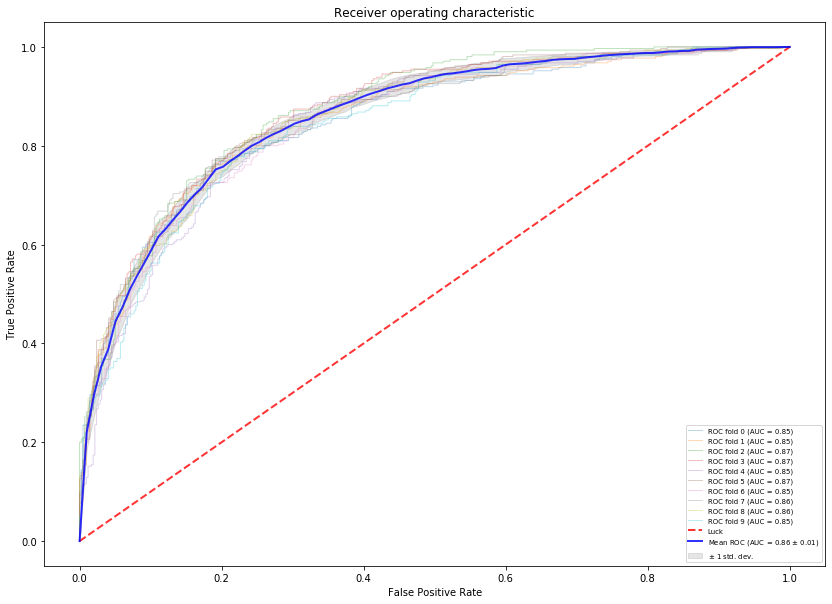

,AUC Train,AUC Test
0,1.0,0.851502
1,1.0,0.854673
2,1.0,0.874830
3,1.0,0.869837
4,1.0,0.847924
5,1.0,0.867599
6,1.0,0.851223
7,1.0,0.858724
8,1.0,0.861305
9,1.0,0.845293


In [122]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [123]:
#Logistic regression

predicted_logit = cross_val_predict(LogisticRegression(multi_class="multinomial", solver='lbfgs'), X, y, cv=10)
print(confusion_matrix(y, predicted_logit))
print(metrics.classification_report(y, predicted_logit))

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[[3520  658]
 [ 896 2207]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      4178
         1.0       0.77      0.71      0.74      3103

    accuracy                           0.79      7281
   macro avg       0.78      0.78      0.78      7281
weighted avg       0.79      0.79      0.79      7281



/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

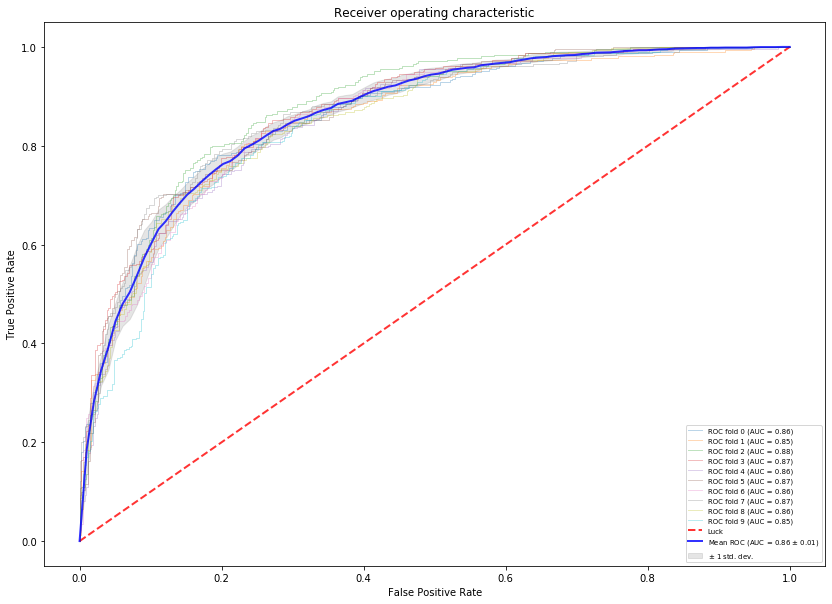

,AUC Train,AUC Test
0,0.871631,0.862859
1,0.872419,0.854623
2,0.869564,0.880167
3,0.870287,0.871971
4,0.872472,0.855309
5,0.870551,0.870250
6,0.872009,0.859091
7,0.870713,0.870042
8,0.872167,0.856925
9,0.873360,0.847841


In [124]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs')
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [125]:
#XGBoost 

import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
predicted_xgboost = cross_val_predict(model, X, y, cv=kfold)
print(confusion_matrix(y, predicted_xgboost))
print(metrics.classification_report(y, predicted_xgboost))

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[[3390  788]
 [ 874 2229]]
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      4178
         1.0       0.74      0.72      0.73      3103

    accuracy                           0.77      7281
   macro avg       0.77      0.76      0.77      7281
weighted avg       0.77      0.77      0.77      7281



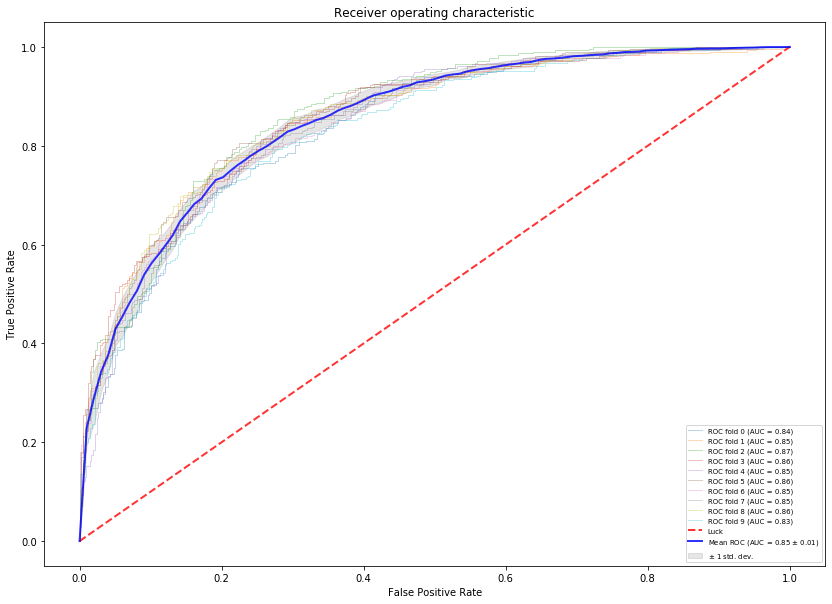

,AUC Train,AUC Test
0,0.999999,0.839228
1,1.000000,0.854669
2,1.000000,0.866121
3,0.999999,0.859461
4,1.000000,0.848511
5,1.000000,0.862209
6,1.000000,0.848480
7,1.000000,0.846435
8,1.000000,0.859947
9,1.000000,0.834016


In [126]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = xgboost.XGBClassifier()
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

# T2D PREDICTION WITH HLAF ONLY

In [146]:
t2d_half_controls[HLAF_data.columns]

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sed morning,percent time sed evening,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening
4479028,-0.632503,0.042984,-0.554435,-0.433510,-0.272965,-0.497305,-0.112605,-0.604978,-0.086187,2.896484,...,-0.097181,0.749939,-0.540794,-0.167089,0.767257,-0.556353,0.010597,-0.417992,-0.690046,0.148452
1260022,-0.583014,0.480330,0.036017,-0.699674,-1.079938,-0.856003,-0.771270,-0.604978,1.121948,-0.686093,...,0.468154,0.070020,-0.701146,0.623259,-0.075001,-0.069870,-0.420255,-0.348773,0.317137,0.425601
2010768,0.070946,1.000200,3.065609,3.455451,0.017172,-0.839342,0.085670,0.449998,-1.184255,-0.350741,...,-1.035192,-2.754867,-0.144241,-2.315491,-0.008486,3.958397,0.214826,3.229199,1.112428,-1.171296
4428288,-1.072115,-0.007941,-0.496756,-0.433510,-0.407747,1.437893,-0.184741,-0.301145,1.213898,-0.273120,...,1.023510,0.204632,-0.461833,0.361886,-0.823262,-0.652012,-0.711871,-0.331034,1.037968,0.867832
1613031,0.557632,-0.396695,0.536034,0.453706,0.507362,-0.233420,1.255373,-0.267386,-0.372588,0.088417,...,0.067759,-0.404561,0.232669,0.044379,-0.924196,-0.669815,-0.439443,-0.139265,-0.069418,-0.048404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,0.803318,0.464552,-0.808086,0.364984,-0.375942,0.001174,-0.823734,-0.604978,0.999022,0.496172,...,1.371533,1.644012,0.497213,0.035891,-0.152590,-0.732694,-1.067707,-0.359314,-1.307103,-1.122385
6022001,-0.906867,-0.709663,-0.754872,-0.699674,-0.196192,0.152788,-0.107629,-0.604978,-0.280715,-0.143414,...,1.102263,1.071841,-0.372905,0.546210,-0.862446,-0.549580,0.180464,-0.417992,0.484073,-0.306170
6023926,-1.046759,-0.461721,-0.590746,-0.699674,0.361166,-0.383895,-0.251328,-0.604978,-0.538970,-0.730819,...,-0.596894,0.768771,-0.464472,0.478586,0.776451,-0.736469,1.853691,-0.247862,0.616762,0.982525
6024863,-0.606273,-0.403712,-1.033995,0.875133,1.570354,2.023735,1.283512,3.623366,-0.875335,-0.621985,...,-1.977685,-1.249966,0.210891,-0.572336,1.138552,0.243907,1.221356,0.095131,0.172559,-0.228482


In [149]:
#T2D Prediction with HLAF ONLY
X = t2d_half_controls[HLAF_data.columns]
X

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sed morning,percent time sed evening,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening
4479028,-0.632503,0.042984,-0.554435,-0.433510,-0.272965,-0.497305,-0.112605,-0.604978,-0.086187,2.896484,...,-0.097181,0.749939,-0.540794,-0.167089,0.767257,-0.556353,0.010597,-0.417992,-0.690046,0.148452
1260022,-0.583014,0.480330,0.036017,-0.699674,-1.079938,-0.856003,-0.771270,-0.604978,1.121948,-0.686093,...,0.468154,0.070020,-0.701146,0.623259,-0.075001,-0.069870,-0.420255,-0.348773,0.317137,0.425601
2010768,0.070946,1.000200,3.065609,3.455451,0.017172,-0.839342,0.085670,0.449998,-1.184255,-0.350741,...,-1.035192,-2.754867,-0.144241,-2.315491,-0.008486,3.958397,0.214826,3.229199,1.112428,-1.171296
4428288,-1.072115,-0.007941,-0.496756,-0.433510,-0.407747,1.437893,-0.184741,-0.301145,1.213898,-0.273120,...,1.023510,0.204632,-0.461833,0.361886,-0.823262,-0.652012,-0.711871,-0.331034,1.037968,0.867832
1613031,0.557632,-0.396695,0.536034,0.453706,0.507362,-0.233420,1.255373,-0.267386,-0.372588,0.088417,...,0.067759,-0.404561,0.232669,0.044379,-0.924196,-0.669815,-0.439443,-0.139265,-0.069418,-0.048404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,0.803318,0.464552,-0.808086,0.364984,-0.375942,0.001174,-0.823734,-0.604978,0.999022,0.496172,...,1.371533,1.644012,0.497213,0.035891,-0.152590,-0.732694,-1.067707,-0.359314,-1.307103,-1.122385
6022001,-0.906867,-0.709663,-0.754872,-0.699674,-0.196192,0.152788,-0.107629,-0.604978,-0.280715,-0.143414,...,1.102263,1.071841,-0.372905,0.546210,-0.862446,-0.549580,0.180464,-0.417992,0.484073,-0.306170
6023926,-1.046759,-0.461721,-0.590746,-0.699674,0.361166,-0.383895,-0.251328,-0.604978,-0.538970,-0.730819,...,-0.596894,0.768771,-0.464472,0.478586,0.776451,-0.736469,1.853691,-0.247862,0.616762,0.982525
6024863,-0.606273,-0.403712,-1.033995,0.875133,1.570354,2.023735,1.283512,3.623366,-0.875335,-0.621985,...,-1.977685,-1.249966,0.210891,-0.572336,1.138552,0.243907,1.221356,0.095131,0.172559,-0.228482


In [150]:
#Random forest
predicted_rf = cross_val_predict(RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0), X, y, cv=10)
print(confusion_matrix(y,predicted_rf))
print(metrics.classification_report(y, predicted_rf))


[[3502  676]
 [1275 1828]]
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78      4178
         1.0       0.73      0.59      0.65      3103

    accuracy                           0.73      7281
   macro avg       0.73      0.71      0.72      7281
weighted avg       0.73      0.73      0.73      7281



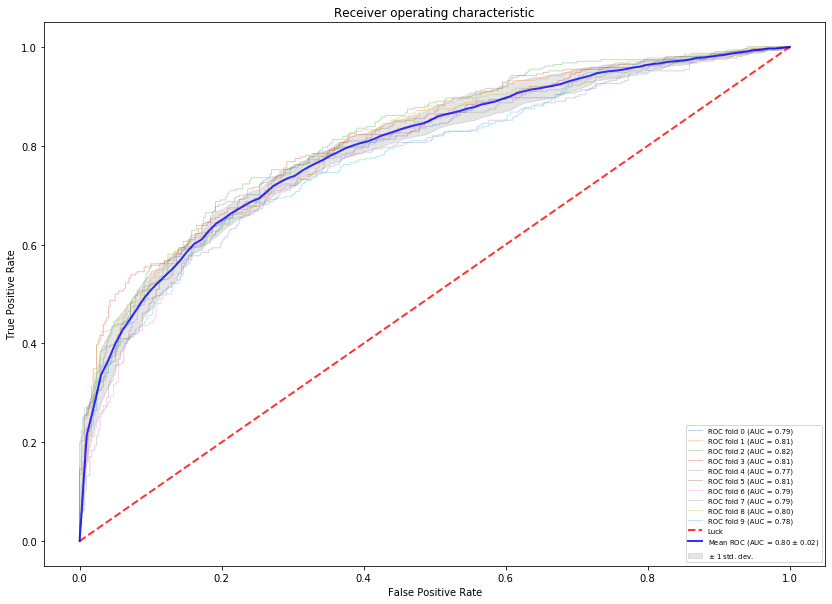

,AUC Train,AUC Test
0,1.0,0.791662
1,1.0,0.805421
2,1.0,0.821651
3,1.0,0.810507
4,1.0,0.768865
5,1.0,0.807852
6,1.0,0.786464
7,1.0,0.791156
8,1.0,0.803037
9,1.0,0.777942


In [151]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [152]:
#Logistic Regression 

predicted_logit = cross_val_predict(LogisticRegression(multi_class="multinomial", solver='lbfgs'), X, y, cv=10)
print(confusion_matrix(y, predicted_logit))
print(metrics.classification_report(y, predicted_logit))

[[3377  801]
 [1162 1941]]
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77      4178
         1.0       0.71      0.63      0.66      3103

    accuracy                           0.73      7281
   macro avg       0.73      0.72      0.72      7281
weighted avg       0.73      0.73      0.73      7281



/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


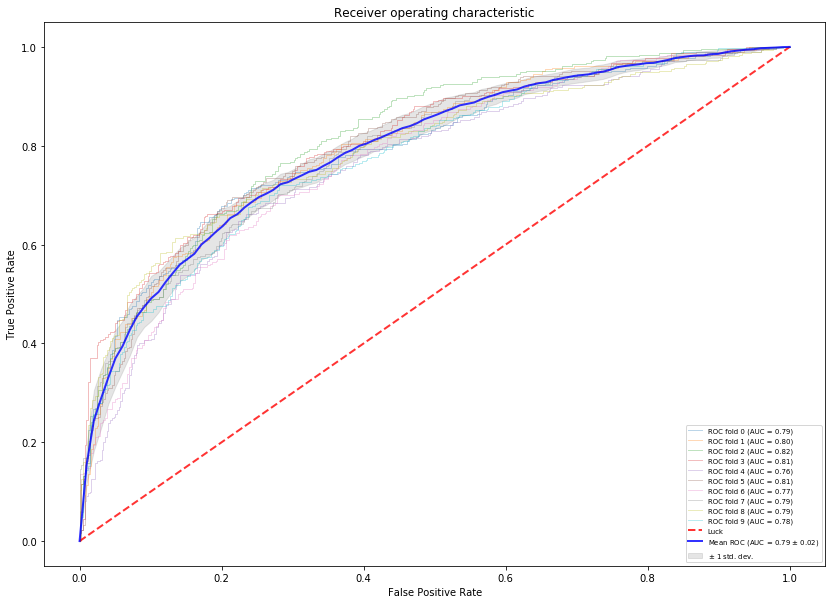

,AUC Train,AUC Test
0,0.802094,0.794435
1,0.801684,0.799668
2,0.799416,0.818575
3,0.800050,0.812872
4,0.805363,0.763521
5,0.800990,0.805495
6,0.803708,0.774664
7,0.802415,0.790778
8,0.802067,0.794551
9,0.803852,0.780171


In [153]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs')
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [154]:
#XGBoost 

import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
predicted_xgboost = cross_val_predict(model, X, y, cv=kfold)
print(confusion_matrix(y, predicted_xgboost))
print(metrics.classification_report(y, predicted_xgboost))

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[[3371  807]
 [1197 1906]]
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77      4178
         1.0       0.70      0.61      0.66      3103

    accuracy                           0.72      7281
   macro avg       0.72      0.71      0.71      7281
weighted avg       0.72      0.72      0.72      7281



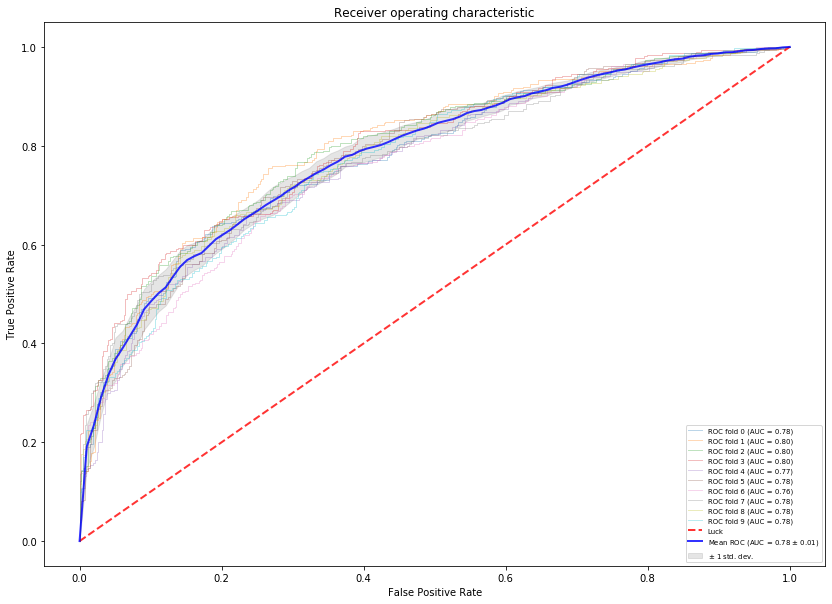

,AUC Train,AUC Test
0,0.999987,0.780574
1,0.999977,0.800386
2,0.999996,0.798495
3,0.999932,0.800695
4,0.999988,0.769826
5,0.999987,0.783979
6,0.999988,0.764771
7,0.999973,0.778916
8,0.999973,0.782738
9,0.999983,0.776631


In [155]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = xgboost.XGBClassifier()
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

# T2D PREDICTION WITH SDL ONLY

In [189]:
SDL_only_df = selected_ukbb.drop(['ethnicity','sex','alcohol drinker status','smoking status','HEALTHY_CVD_T2D1_T2D2'], axis=1)
SDL_only = list(SDL_only_df.columns)
SDL_only.extend(ukbb_vars_categorical_encoded.columns)

['body_fat',
 'Townsend deprivation',
 'Time spent watching TV',
 'sleep duration',
 'duration of walks',
 'duration of moderate activity',
 'duration of vigorous activity',
 'Waist circumference',
 'age at assessment centre',
 'sex_0',
 'sex_1',
 'ethnicity_1',
 'ethnicity_1001',
 'ethnicity_1002',
 'ethnicity_1003',
 'ethnicity_2',
 'ethnicity_2001',
 'ethnicity_2002',
 'ethnicity_2003',
 'ethnicity_2004',
 'ethnicity_3',
 'ethnicity_3001',
 'ethnicity_3002',
 'ethnicity_3003',
 'ethnicity_3004',
 'ethnicity_4001',
 'ethnicity_4002',
 'ethnicity_4003',
 'ethnicity_5',
 'ethnicity_6',
 'smoking status_0',
 'smoking status_1',
 'smoking status_2',
 'alcohol drinker status_0',
 'alcohol drinker status_1',
 'alcohol drinker status_2']

In [191]:
for i in SDL_only:
    print(i)

body_fat
Townsend deprivation
Time spent watching TV
sleep duration
duration of walks
duration of moderate activity
duration of vigorous activity
Waist circumference
age at assessment centre
sex_0
sex_1
ethnicity_1
ethnicity_1001
ethnicity_1002
ethnicity_1003
ethnicity_2
ethnicity_2001
ethnicity_2002
ethnicity_2003
ethnicity_2004
ethnicity_3
ethnicity_3001
ethnicity_3002
ethnicity_3003
ethnicity_3004
ethnicity_4001
ethnicity_4002
ethnicity_4003
ethnicity_5
ethnicity_6
smoking status_0
smoking status_1
smoking status_2
alcohol drinker status_0
alcohol drinker status_1
alcohol drinker status_2


In [192]:
#T2D Prediction with SDL ONLY

X = t2d_half_controls[SDL_only]
X

,body_fat,Townsend deprivation,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,sex_0,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
4479028,-0.656681,0.755196,1.483708,-0.163301,0.138482,0.082910,-0.112819,0.685349,-0.547506,0,...,0,0,0,0,1,0,0,0,0,1
1260022,-1.784781,-0.532149,-1.049547,-1.146254,-0.478186,-0.462527,0.050469,-0.471609,-1.456857,0,...,0,0,0,0,1,0,0,0,0,1
2010768,-0.926955,0.116301,0.217081,-1.146254,-0.092769,0.208353,0.631240,0.277011,-0.547506,0,...,0,0,0,0,1,0,0,0,0,1
4428288,-1.103221,-0.366724,-0.416233,-1.146254,-0.709437,-0.384608,0.631240,-0.403553,-0.287692,0,...,0,0,0,0,1,0,0,0,0,1
1613031,-0.997461,-0.403743,-1.682861,-0.163301,-0.478186,-0.618367,-0.820118,-1.220230,-1.456857,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,0.682938,0.948960,-0.416233,-2.129207,-0.555270,-0.394674,-0.582180,2.454815,-0.027877,0,...,0,0,0,0,0,1,0,0,0,1
6022001,-0.080880,-0.645607,0.850394,-0.163301,0.138482,0.082910,0.262665,0.208954,-0.677413,0,...,0,0,0,0,0,1,0,0,0,1
6023926,0.024880,0.105792,0.850394,-0.163301,-0.801937,-0.490974,-1.139416,0.957575,0.491752,0,...,0,0,0,0,0,1,0,0,0,1
6024863,0.083635,0.906392,0.217081,-1.146254,-0.801937,-0.867710,-0.239575,-0.948004,-0.547506,1,...,0,0,1,0,1,0,0,0,0,1


In [193]:
#Random forest
predicted_rf = cross_val_predict(RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0), X, y, cv=10)
print(confusion_matrix(y,predicted_rf))
print(metrics.classification_report(y, predicted_rf))


[[3260  918]
 [ 971 2132]]
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78      4178
         1.0       0.70      0.69      0.69      3103

    accuracy                           0.74      7281
   macro avg       0.73      0.73      0.73      7281
weighted avg       0.74      0.74      0.74      7281



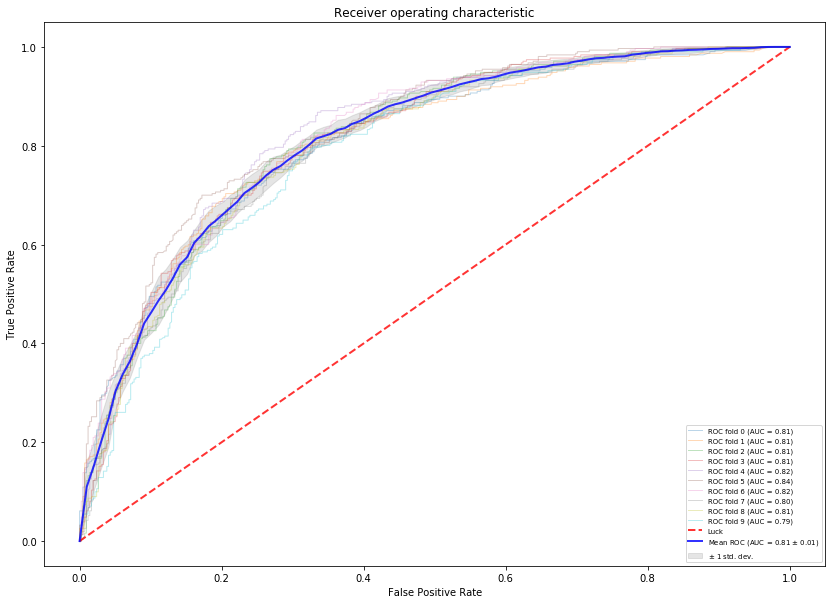

,AUC Train,AUC Test
0,1.0,0.809989
1,1.0,0.809095
2,1.0,0.814362
3,1.0,0.813991
4,1.0,0.824853
5,1.0,0.836225
6,1.0,0.824421
7,1.0,0.803222
8,1.0,0.805385
9,1.0,0.790087


In [194]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [195]:
#Logistic Regression 

predicted_logit = cross_val_predict(LogisticRegression(multi_class="multinomial", solver='lbfgs'), X, y, cv=10)
print(confusion_matrix(y, predicted_logit))
print(metrics.classification_report(y, predicted_logit))

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[[3379  799]
 [1040 2063]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79      4178
         1.0       0.72      0.66      0.69      3103

    accuracy                           0.75      7281
   macro avg       0.74      0.74      0.74      7281
weighted avg       0.75      0.75      0.75      7281



/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

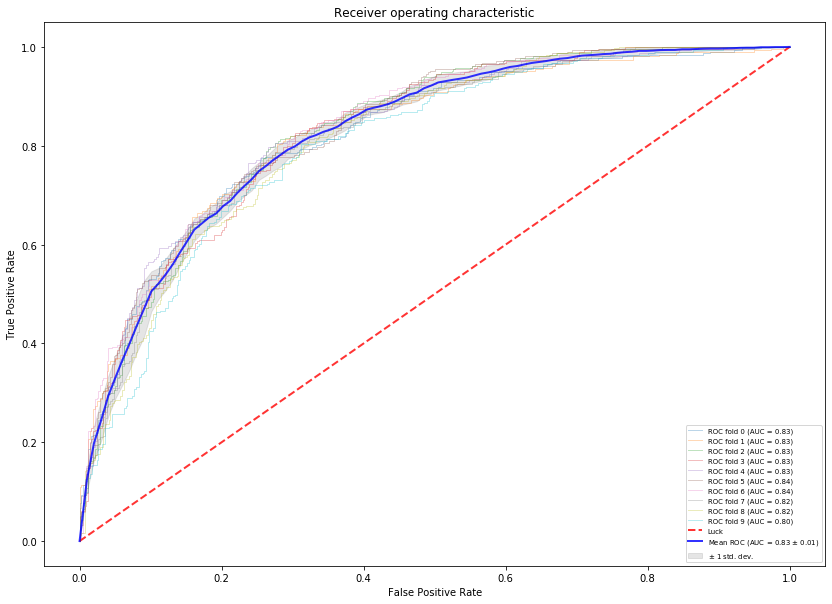

,AUC Train,AUC Test
0,0.829758,0.826005
1,0.829601,0.827790
2,0.828744,0.833470
3,0.829061,0.831154
4,0.828743,0.832652
5,0.828454,0.836302
6,0.828380,0.838702
7,0.829894,0.823175
8,0.831000,0.815610
9,0.832096,0.803388


In [196]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs')
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [197]:
#XGBoost

import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
predicted_xgboost = cross_val_predict(model, X, y, cv=kfold)
print(confusion_matrix(y, predicted_xgboost))
print(metrics.classification_report(y, predicted_xgboost))

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[[3199  979]
 [1039 2064]]
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76      4178
         1.0       0.68      0.67      0.67      3103

    accuracy                           0.72      7281
   macro avg       0.72      0.72      0.72      7281
weighted avg       0.72      0.72      0.72      7281



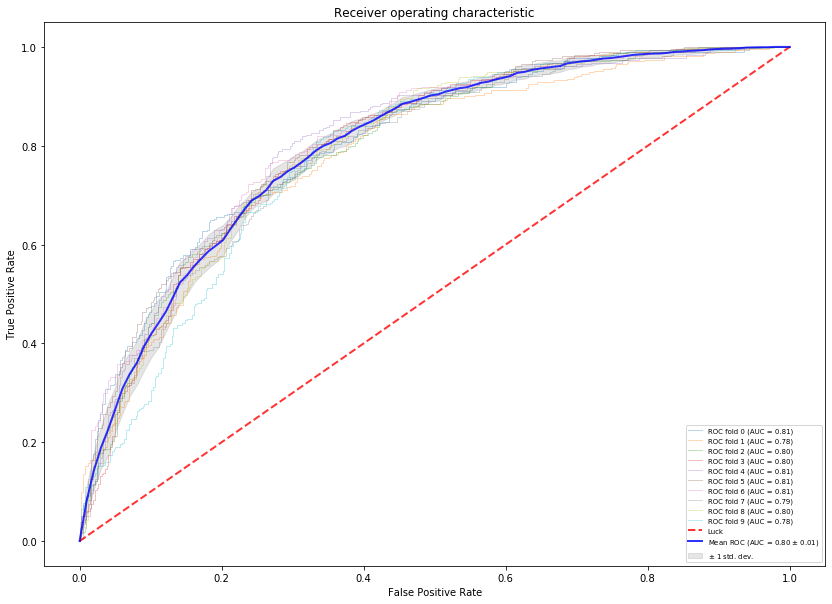

,AUC Train,AUC Test
0,0.983244,0.805851
1,0.982868,0.782829
2,0.990083,0.795370
3,0.981989,0.801165
4,0.988199,0.810272
5,0.985892,0.811028
6,0.985889,0.811676
7,0.988218,0.788717
8,0.989108,0.799240
9,0.986343,0.784797


In [198]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = xgboost.XGBClassifier()
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [260]:
HLAF_data_t2d = HLAF_data
HLAF_data_t2d

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sed evening,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening,t2d_status
id,,,,,,,,,,,,,,,,,,,,,
1313669,14.560601,11.353175,2.664172,3.500000,33.818254,10.190476,1.607205,0.928571,55.434066,5.309524,...,74.135012,0.000000,96.176046,82.647475,12.411087,20.120305,0.414863,2.782738,5.595983,0
1354616,6.885714,2.428571,0.922619,0.000000,16.746032,8.586735,1.994048,0.000000,86.632738,3.714286,...,53.788514,2.306548,95.874162,73.688242,33.353428,13.753724,0.128932,3.006837,1.875248,0
1061117,8.523016,6.690476,1.071429,0.000000,11.058503,11.892857,1.071475,0.000000,72.283447,18.642857,...,71.156882,6.547619,96.913580,80.267578,21.386954,13.231029,0.052910,2.098276,3.452815,0
1783466,7.660714,3.000000,0.238095,3.214286,6.125000,5.214286,2.306641,6.785714,21.336395,16.678571,...,28.577822,4.390393,3.588682,10.785044,13.549068,6.623762,4.071774,5.699870,1.250528,0
1160953,13.734014,14.204762,0.744048,0.857143,3.142857,5.333333,0.000000,0.000000,72.833009,9.714286,...,67.300356,15.464615,93.473532,79.220977,23.486069,4.390471,0.120861,0.238095,2.098587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168784,5.035714,2.285714,1.443001,0.000000,13.287415,12.428571,5.248918,1.714286,60.987446,12.571429,...,88.690476,1.046176,95.228628,58.170996,0.829726,18.542569,0.397614,5.501443,5.194805,0
1135595,5.000000,5.785714,1.904762,0.571429,0.857143,7.130952,0.891591,0.428571,56.870708,9.035714,...,57.304965,4.072948,95.169444,30.759878,16.980750,26.666667,1.441678,28.389058,20.466059,0
1191197,13.930612,19.372449,10.141608,0.000000,13.180556,9.826190,4.414827,0.000000,44.609099,31.285714,...,45.855893,0.770512,96.084914,33.402749,13.348605,25.989171,0.087002,21.407747,20.283215,0


In [261]:
t2d_population_ids = list(new_t2d_population.index)
HLAF_data_t2d['t2d_status'] = 0
HLAF_data_t2d

for HLAF_index in HLAF_data_t2d.index:
    for t2d_index in t2d_population_ids:
        if HLAF_index == t2d_index:
            
            HLAF_data_t2d.set_value(HLAF_index,'t2d_status',1)

HLAF_data_t2d

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sed evening,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening,t2d_status
id,,,,,,,,,,,,,,,,,,,,,
1313669,14.560601,11.353175,2.664172,3.500000,33.818254,10.190476,1.607205,0.928571,55.434066,5.309524,...,74.135012,0.000000,96.176046,82.647475,12.411087,20.120305,0.414863,2.782738,5.595983,0
1354616,6.885714,2.428571,0.922619,0.000000,16.746032,8.586735,1.994048,0.000000,86.632738,3.714286,...,53.788514,2.306548,95.874162,73.688242,33.353428,13.753724,0.128932,3.006837,1.875248,0
1061117,8.523016,6.690476,1.071429,0.000000,11.058503,11.892857,1.071475,0.000000,72.283447,18.642857,...,71.156882,6.547619,96.913580,80.267578,21.386954,13.231029,0.052910,2.098276,3.452815,0
1783466,7.660714,3.000000,0.238095,3.214286,6.125000,5.214286,2.306641,6.785714,21.336395,16.678571,...,28.577822,4.390393,3.588682,10.785044,13.549068,6.623762,4.071774,5.699870,1.250528,0
1160953,13.734014,14.204762,0.744048,0.857143,3.142857,5.333333,0.000000,0.000000,72.833009,9.714286,...,67.300356,15.464615,93.473532,79.220977,23.486069,4.390471,0.120861,0.238095,2.098587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168784,5.035714,2.285714,1.443001,0.000000,13.287415,12.428571,5.248918,1.714286,60.987446,12.571429,...,88.690476,1.046176,95.228628,58.170996,0.829726,18.542569,0.397614,5.501443,5.194805,0
1135595,5.000000,5.785714,1.904762,0.571429,0.857143,7.130952,0.891591,0.428571,56.870708,9.035714,...,57.304965,4.072948,95.169444,30.759878,16.980750,26.666667,1.441678,28.389058,20.466059,0
1191197,13.930612,19.372449,10.141608,0.000000,13.180556,9.826190,4.414827,0.000000,44.609099,31.285714,...,45.855893,0.770512,96.084914,33.402749,13.348605,25.989171,0.087002,21.407747,20.283215,0


In [262]:
HLAF_activity_scores = pd.read_csv("HLAF_activity_impact_score.csv")
HLAF_activity_scores

,eid,activity_score
0,1000132,0.0
1,1000401,10.0
2,1000558,0.0
3,1000599,100.0
4,1000647,0.0
...,...,...
25501,6025656,0.0
25502,6025826,44.2
25503,6026025,0.0
25504,6026054,0.0


In [263]:
HLAF_activity_scores_2 = pd.read_csv("gp_clinical_eid_activity_impact_score.csv")
HLAF_activity_scores_2

,eid,activity_score
0,1000071,0.0
1,1000419,10.0
2,1000522,0.0
3,1000574,0.0
4,1000885,0.0
...,...,...
19847,6025994,0.0
19848,6026224,0.0
19849,6026398,0.0
19850,6026451,0.0


In [264]:
HLAF_activity_scores = HLAF_activity_scores.append(HLAF_activity_scores_2)
HLAF_activity_scores

,eid,activity_score
0,1000132,0.0
1,1000401,10.0
2,1000558,0.0
3,1000599,100.0
4,1000647,0.0
...,...,...
19847,6025994,0.0
19848,6026224,0.0
19849,6026398,0.0
19850,6026451,0.0


In [265]:
HLAF_activity_scores.drop_duplicates(inplace=True)
HLAF_activity_scores

,eid,activity_score
0,1000132,0.0
1,1000401,10.0
2,1000558,0.0
3,1000599,100.0
4,1000647,0.0
...,...,...
19847,6025994,0.0
19848,6026224,0.0
19849,6026398,0.0
19850,6026451,0.0


In [266]:
HLAF_activity_scores.set_index('eid', drop=True, inplace=True)
HLAF_activity_scores

,activity_score
eid,
1000132,0.0
1000401,10.0
1000558,0.0
1000599,100.0
1000647,0.0
...,...
6025994,0.0
6026224,0.0
6026398,0.0


In [267]:
HLAF_data_t2d

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sed evening,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening,t2d_status
id,,,,,,,,,,,,,,,,,,,,,
1313669,14.560601,11.353175,2.664172,3.500000,33.818254,10.190476,1.607205,0.928571,55.434066,5.309524,...,74.135012,0.000000,96.176046,82.647475,12.411087,20.120305,0.414863,2.782738,5.595983,0
1354616,6.885714,2.428571,0.922619,0.000000,16.746032,8.586735,1.994048,0.000000,86.632738,3.714286,...,53.788514,2.306548,95.874162,73.688242,33.353428,13.753724,0.128932,3.006837,1.875248,0
1061117,8.523016,6.690476,1.071429,0.000000,11.058503,11.892857,1.071475,0.000000,72.283447,18.642857,...,71.156882,6.547619,96.913580,80.267578,21.386954,13.231029,0.052910,2.098276,3.452815,0
1783466,7.660714,3.000000,0.238095,3.214286,6.125000,5.214286,2.306641,6.785714,21.336395,16.678571,...,28.577822,4.390393,3.588682,10.785044,13.549068,6.623762,4.071774,5.699870,1.250528,0
1160953,13.734014,14.204762,0.744048,0.857143,3.142857,5.333333,0.000000,0.000000,72.833009,9.714286,...,67.300356,15.464615,93.473532,79.220977,23.486069,4.390471,0.120861,0.238095,2.098587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168784,5.035714,2.285714,1.443001,0.000000,13.287415,12.428571,5.248918,1.714286,60.987446,12.571429,...,88.690476,1.046176,95.228628,58.170996,0.829726,18.542569,0.397614,5.501443,5.194805,0
1135595,5.000000,5.785714,1.904762,0.571429,0.857143,7.130952,0.891591,0.428571,56.870708,9.035714,...,57.304965,4.072948,95.169444,30.759878,16.980750,26.666667,1.441678,28.389058,20.466059,0
1191197,13.930612,19.372449,10.141608,0.000000,13.180556,9.826190,4.414827,0.000000,44.609099,31.285714,...,45.855893,0.770512,96.084914,33.402749,13.348605,25.989171,0.087002,21.407747,20.283215,0


In [268]:
HLAF_t2d = HLAF_data_t2d[HLAF_data_t2d['t2d_status'] == 1]
HLAF_t2d

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sed evening,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening,t2d_status
id,,,,,,,,,,,,,,,,,,,,,
1336388,9.523810,10.714286,0.104167,1.000000,10.283333,11.952381,0.297619,0.000000,55.351422,57.500000,...,76.055384,37.644697,64.928801,76.603543,15.878100,10.446537,0.620119,0.684524,4.196692,1
1853412,8.988305,11.619048,2.009317,1.571429,8.439337,18.223810,0.952691,0.857143,64.079739,0.285714,...,35.215176,0.982841,85.028993,61.453182,32.148878,15.121391,0.351432,6.013348,5.596495,1
1453839,2.857143,4.000000,0.029793,0.285714,6.742857,6.404762,1.160714,0.000000,101.351835,31.857143,...,46.971455,9.703064,93.997208,59.130543,48.652351,11.979710,0.651466,3.839798,2.261998,1
1075924,11.312245,8.250000,3.184958,0.000000,11.903061,16.650000,2.977122,0.000000,45.926038,18.476190,...,52.447024,0.580357,95.970696,80.143968,31.300105,32.862869,0.000000,6.013860,10.224906,1
1725503,7.200000,11.321429,3.095347,4.000000,22.937925,10.841270,6.101253,0.857143,70.404989,5.500000,...,57.584724,9.988378,97.690802,69.162912,29.200199,16.251164,0.587084,8.677007,5.789311,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272717,14.418367,11.166667,4.843573,0.857143,9.577381,7.642857,2.487750,0.000000,34.109578,14.000000,...,83.678854,3.637392,93.330180,29.061440,0.603091,30.644553,0.307474,5.522051,7.293630,1
1274196,8.714286,3.928571,5.657709,0.428571,15.196197,15.482993,6.445747,0.000000,35.314214,4.785714,...,73.865353,0.949687,84.829663,38.038445,11.219825,21.847748,0.075287,9.355568,6.062088,1
1289356,15.816513,18.489796,14.617169,2.571429,12.363095,7.714286,2.966523,0.000000,52.353466,13.452381,...,52.204176,4.822672,88.111546,58.418959,27.858800,9.695061,0.146771,2.038449,5.353000,1


In [269]:
HLAF_data_t2d = HLAF_data_t2d.merge(HLAF_activity_scores,left_index=True,right_index=True,how='inner')
HLAF_data_t2d


,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,percent time sleep afternoon,percent time sleep overnight,percent time sleep morning,percent time sleep evening,percent time walking afternoon,percent time walking overnight,percent time walking morning,percent time walking evening,t2d_status,activity_score
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,2.228047,99.237473,32.116213,2.317328,24.450414,0.000000,12.543712,17.587744,0,0.0
1000132,12.083333,9.897619,4.910714,0.000000,16.761905,10.071429,2.217262,0.000000,60.968859,5.023810,...,2.411552,83.882256,61.772882,36.237772,13.620215,0.411692,3.497024,6.770895,0,0.0
1000401,5.142857,7.107143,1.383929,0.000000,14.038095,14.904762,4.346076,3.285714,77.062626,23.857143,...,9.479167,95.262391,71.468280,35.049919,15.225154,0.291545,6.192059,8.558425,0,10.0
1000419,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,17.047619,...,0.930413,93.767402,41.480907,7.520837,19.306067,0.835297,5.873231,11.203722,1,10.0
1000558,16.664286,19.114286,2.485119,1.666667,11.706044,13.297619,0.729244,1.380952,87.822449,8.535714,...,0.758929,95.689796,68.464671,44.303947,7.471712,1.583673,4.047836,4.107484,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026054,9.252381,1.380952,1.785714,0.857143,17.066790,8.007143,2.544643,0.000000,59.164286,1.428571,...,0.104167,96.709295,66.423280,40.884105,17.769843,0.873362,6.755952,4.584683,0,0.0
6026203,11.020408,4.071429,1.146066,1.285714,20.254592,16.855442,10.983586,0.000000,47.571637,2.000000,...,3.526786,82.560297,56.169233,38.502377,21.716585,0.463822,7.783328,3.586604,0,0.0
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,0.970874,82.397602,35.644938,4.596790,21.636616,0.459540,14.979196,9.807807,0,0.0
6026398,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,6.974325,0.000000,36.942203,5.571429,...,2.156301,98.340548,42.510915,1.968873,27.317750,0.288600,14.569319,16.482664,0,0.0


In [270]:
HLAF_data_t2d = HLAF_data_t2d.append(HLAF_t2d)
HLAF_data_t2d

/Users/b3018678/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,activity_score,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,...,percent time sed overnight,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,t2d_status
1000071,0.0,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,...,0.746965,2.228047,2.317328,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,0
1000132,0.0,12.083333,9.897619,4.910714,0.000000,16.761905,10.071429,2.217262,0.000000,60.968859,...,1.420338,2.411552,36.237772,61.772882,83.882256,13.620215,6.770895,3.497024,0.411692,0
1000401,10.0,5.142857,7.107143,1.383929,0.000000,14.038095,14.904762,4.346076,3.285714,77.062626,...,4.026968,9.479167,35.049919,71.468280,95.262391,15.225154,8.558425,6.192059,0.291545,0
1000419,10.0,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,...,4.497751,0.930413,7.520837,41.480907,93.767402,19.306067,11.203722,5.873231,0.835297,1
1000558,0.0,16.664286,19.114286,2.485119,1.666667,11.706044,13.297619,0.729244,1.380952,87.822449,...,1.502041,0.758929,44.303947,68.464671,95.689796,7.471712,4.107484,4.047836,1.583673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272717,NaN,14.418367,11.166667,4.843573,0.857143,9.577381,7.642857,2.487750,0.000000,34.109578,...,2.956481,3.637392,0.603091,29.061440,93.330180,30.644553,7.293630,5.522051,0.307474,1
1274196,NaN,8.714286,3.928571,5.657709,0.428571,15.196197,15.482993,6.445747,0.000000,35.314214,...,0.752870,0.949687,11.219825,38.038445,84.829663,21.847748,6.062088,9.355568,0.075287,1
1289356,NaN,15.816513,18.489796,14.617169,2.571429,12.363095,7.714286,2.966523,0.000000,52.353466,...,10.322896,4.822672,27.858800,58.418959,88.111546,9.695061,5.353000,2.038449,0.146771,1
1132636,NaN,9.111905,9.136054,1.900922,0.857143,10.540476,16.828571,5.261137,1.142857,40.175505,...,3.665268,1.766513,6.989247,58.698157,91.852506,36.770353,21.313364,11.136713,1.103996,1


In [271]:
HLAF_data_t2d.to_csv("HLAF_t2d_impact_scores.csv", index=True)

In [273]:
HLAF_data_t2d = HLAF_data_t2d.drop_duplicates()
HLAF_data_t2d

,activity_score,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,...,percent time sed overnight,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,t2d_status
1000071,0.0,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,...,0.746965,2.228047,2.317328,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,0
1000132,0.0,12.083333,9.897619,4.910714,0.000000,16.761905,10.071429,2.217262,0.000000,60.968859,...,1.420338,2.411552,36.237772,61.772882,83.882256,13.620215,6.770895,3.497024,0.411692,0
1000401,10.0,5.142857,7.107143,1.383929,0.000000,14.038095,14.904762,4.346076,3.285714,77.062626,...,4.026968,9.479167,35.049919,71.468280,95.262391,15.225154,8.558425,6.192059,0.291545,0
1000419,10.0,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,...,4.497751,0.930413,7.520837,41.480907,93.767402,19.306067,11.203722,5.873231,0.835297,1
1000558,0.0,16.664286,19.114286,2.485119,1.666667,11.706044,13.297619,0.729244,1.380952,87.822449,...,1.502041,0.758929,44.303947,68.464671,95.689796,7.471712,4.107484,4.047836,1.583673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272717,NaN,14.418367,11.166667,4.843573,0.857143,9.577381,7.642857,2.487750,0.000000,34.109578,...,2.956481,3.637392,0.603091,29.061440,93.330180,30.644553,7.293630,5.522051,0.307474,1
1274196,NaN,8.714286,3.928571,5.657709,0.428571,15.196197,15.482993,6.445747,0.000000,35.314214,...,0.752870,0.949687,11.219825,38.038445,84.829663,21.847748,6.062088,9.355568,0.075287,1
1289356,NaN,15.816513,18.489796,14.617169,2.571429,12.363095,7.714286,2.966523,0.000000,52.353466,...,10.322896,4.822672,27.858800,58.418959,88.111546,9.695061,5.353000,2.038449,0.146771,1
1132636,NaN,9.111905,9.136054,1.900922,0.857143,10.540476,16.828571,5.261137,1.142857,40.175505,...,3.665268,1.766513,6.989247,58.698157,91.852506,36.770353,21.313364,11.136713,1.103996,1


In [282]:
HLAF_data_t2d['activity_score'].isna().sum()

3103

In [284]:
HLAF_data_t2d[HLAF_data_t2d['activity_score'] < 10]

,activity_score,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,...,percent time sed overnight,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,t2d_status
1000071,0.0,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,...,0.746965,2.228047,2.317328,32.116213,99.237473,24.450414,17.587744,12.543712,0.000000,0
1000132,0.0,12.083333,9.897619,4.910714,0.000000,16.761905,10.071429,2.217262,0.000000,60.968859,...,1.420338,2.411552,36.237772,61.772882,83.882256,13.620215,6.770895,3.497024,0.411692,0
1000558,0.0,16.664286,19.114286,2.485119,1.666667,11.706044,13.297619,0.729244,1.380952,87.822449,...,1.502041,0.758929,44.303947,68.464671,95.689796,7.471712,4.107484,4.047836,1.583673,0
1000574,0.0,14.390306,19.248701,7.912088,0.142857,20.985714,21.481293,4.813187,0.000000,66.176304,...,0.876519,0.197802,0.000000,15.450549,96.770721,18.285714,19.648352,16.109890,0.399815,0
1000647,0.0,12.053846,8.071429,4.345378,0.000000,10.450680,6.928571,0.907831,0.285714,66.675092,...,1.788284,1.577381,65.872312,48.567394,98.067831,14.763922,1.711666,11.295000,0.020555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026054,0.0,9.252381,1.380952,1.785714,0.857143,17.066790,8.007143,2.544643,0.000000,59.164286,...,0.311915,0.104167,40.884105,66.423280,96.709295,17.769843,4.584683,6.755952,0.873362,0
6026203,0.0,11.020408,4.071429,1.146066,1.285714,20.254592,16.855442,10.983586,0.000000,47.571637,...,0.432900,3.526786,38.502377,56.169233,82.560297,21.716585,3.586604,7.783328,0.463822,0
6026224,0.0,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,...,2.517483,0.970874,4.596790,35.644938,82.397602,21.636616,9.807807,14.979196,0.459540,0
6026398,0.0,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,6.974325,0.000000,36.942203,...,1.154401,2.156301,1.968873,42.510915,98.340548,27.317750,16.482664,14.569319,0.288600,0


In [285]:
HLAF_data_t2d[(HLAF_data_t2d['activity_score']) > 10 & (HLAF_data_t2d['activity_score'] <=50)]

,activity_score,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,...,percent time sed overnight,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,t2d_status
1000401,10.000000,5.142857,7.107143,1.383929,0.000000,14.038095,14.904762,4.346076,3.285714,77.062626,...,4.026968,9.479167,35.049919,71.468280,95.262391,15.225154,8.558425,6.192059,0.291545,0
1000419,10.000000,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,...,4.497751,0.930413,7.520837,41.480907,93.767402,19.306067,11.203722,5.873231,0.835297,1
1000599,100.000000,7.972789,6.678571,2.083442,1.285714,20.328571,12.547619,4.375310,1.428571,54.665056,...,3.282597,0.000000,28.502300,71.856550,94.920227,24.197825,15.179596,4.107376,0.458463,0
1001288,1.000000,13.961111,11.480952,3.764881,0.428571,13.067100,2.404762,2.797619,0.000000,37.355717,...,2.164502,0.327381,45.866090,49.107158,80.375180,31.701348,5.060781,12.053571,0.371058,0
1002920,10.000000,7.683333,8.023810,4.901014,2.715278,8.495238,8.309524,2.182540,1.857143,3.966703,...,59.523810,11.825397,59.424603,35.323807,17.936508,6.686508,1.388889,6.508571,7.043651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023843,200.000000,15.330952,13.761905,3.162990,10.642857,2.571429,9.761905,1.368020,5.928571,97.453927,...,1.842842,0.538660,0.516622,21.425574,93.247825,7.469347,12.448853,6.257467,2.594722,0
6023934,7.750000,9.720635,7.295238,7.079124,0.000000,14.413595,19.563832,15.718925,0.428571,42.578644,...,1.705069,0.087912,6.774040,38.293334,98.202765,22.314567,2.198446,5.738329,0.046083,0
6024553,1.782609,11.165221,7.166667,2.232143,0.000000,10.623129,14.853741,2.157738,0.000000,44.229657,...,4.159948,1.428571,29.632197,61.870267,90.712673,24.871627,12.769843,6.041698,0.000000,0
6025114,5.500000,7.801020,10.700794,4.793094,0.000000,8.298469,11.669841,3.437872,0.000000,70.877149,...,0.762922,0.000000,34.277211,61.778561,98.645813,18.012159,7.203234,9.376831,0.495899,0


In [287]:
HLAF_data_t2d[HLAF_data_t2d['activity_score'] > 50]

,activity_score,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,...,percent time sed overnight,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,t2d_status
1000599,100.000000,7.972789,6.678571,2.083442,1.285714,20.328571,12.547619,4.375310,1.428571,54.665056,...,3.282597,0.000000,28.502300,71.856550,94.920227,24.197825,15.179596,4.107376,0.458463,0
1003342,73.666667,5.142857,0.285714,0.283688,0.000000,8.873016,14.443878,2.958460,0.000000,39.833333,...,1.140613,0.000000,2.613982,36.474164,96.372476,34.123607,8.166160,14.609929,0.186986,0
1003695,65.000000,11.650000,10.436508,10.809725,1.142857,21.151361,16.988889,6.951979,1.714286,42.606447,...,2.240521,1.748041,7.092626,22.041390,84.469552,13.562387,12.859152,9.423347,0.000000,0
1004224,100.000000,6.047619,5.142857,3.706304,1.000000,13.651984,22.096599,4.583504,2.785714,59.039824,...,3.207603,0.000000,38.026963,67.092551,95.871696,18.528462,1.964286,3.154871,0.237600,0
1004377,52.750000,13.165646,17.942177,16.601136,14.250000,1.000000,10.906122,1.681957,0.000000,56.009070,...,5.193387,0.415028,1.529052,21.974661,89.909545,24.530363,19.855832,8.977720,0.826575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019087,100.000000,23.165136,12.883787,32.600733,7.571429,15.112245,11.628571,6.313750,6.000000,25.858277,...,3.030303,1.572937,12.520156,20.179589,93.570627,34.336119,21.035451,13.424222,1.138368,0
6020107,73.857143,16.825866,14.940008,10.554931,11.285714,10.619048,12.923810,6.017998,2.571429,38.412403,...,11.515298,15.935508,8.117735,42.257218,81.739340,19.441320,18.260217,6.824147,3.926765,0
6020816,50.500000,18.142680,15.204762,12.023810,13.142857,8.195238,1.071429,2.455357,1.285714,36.175235,...,2.181352,3.602773,62.211365,57.559524,91.659538,19.675428,6.132318,12.425595,1.967494,0
6021047,100.000000,7.285714,15.966667,1.367781,0.000000,10.404762,13.595238,1.867130,0.000000,66.678571,...,1.515391,4.494138,4.103343,31.328702,98.437253,20.777247,13.634390,6.643508,0.000000,0


In [294]:
control_population[control_population['HEALTHY_CVD_T2D1_T2D2'] == '3']

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
1004032,4.500000,4.666667,0.982399,0.000000,22.346939,15.958333,2.599263,0.000000,50.747100,11.357143,...,1,2,5,8,75,,,126,3,65
1004949,10.028571,6.976190,5.434783,1.857143,8.404762,12.229932,10.581189,5.214286,48.087771,17.500000,...,0,2,3,8,-1,30,-1,91,3,62
1006811,21.652721,17.990476,6.652452,1.857143,4.595238,8.166667,1.343284,0.000000,110.040476,5.321429,...,0,2,4,2,80,80,30,123,3,68
1011723,4.625000,8.595238,0.253240,1.428571,1.071429,2.785714,0.238266,0.857143,24.914683,99.857143,...,1,2,3,9,60,,10,115,3,61
1015274,16.371088,10.952381,4.989232,1.000000,15.841497,12.019728,4.720029,0.000000,67.912986,51.785714,...,1,2,3,7,60,,60,90,3,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012850,10.896259,7.857143,0.133668,0.000000,9.543537,7.142857,0.367586,0.428571,42.131933,60.071429,...,0,2,6,7,-1,,-1,102,3,67
6013097,10.261905,10.392857,0.775901,0.571429,10.850340,14.748299,4.062072,1.714286,58.306349,12.500000,...,1,2,3,7,15,10,10,122,3,53
6019959,14.226190,12.476190,1.617251,3.428571,9.392857,11.571429,1.264773,0.000000,83.727381,26.357143,...,1,2,2,5,15,,,128,3,57
6023926,5.829365,7.761905,2.557545,0.000000,13.767972,9.291667,3.653752,0.000000,37.822535,6.761905,...,1,2,4,7,-1,,-1,106,3,61


In [295]:
new_t2d_population

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,t2d_status
1000419,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,17.047619,...,2,2,7,45,60,30,97,1,53,1
1004032,4.500000,4.666667,0.982399,0.000000,22.346939,15.958333,2.599263,0.000000,50.747100,11.357143,...,2,5,8,75,,,126,3,65,1
1004801,11.585065,5.428571,2.336310,0.000000,10.259070,7.085714,1.011905,0.000000,44.913900,6.571429,...,1,3,8,60,45,,128,,54,1
1004949,10.028571,6.976190,5.434783,1.857143,8.404762,12.229932,10.581189,5.214286,48.087771,17.500000,...,2,3,8,-1,30,-1,91,3,62,1
1005787,8.401587,13.035374,10.168042,0.714286,7.083333,7.476190,3.674396,0.000000,64.288873,31.666667,...,2,0,8,90,30,10,81,0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,14.226190,12.476190,1.617251,3.428571,9.392857,11.571429,1.264773,0.000000,83.727381,26.357143,...,2,2,5,15,,,128,3,57,1
6022001,6.464286,6.500000,1.847476,0.000000,10.459768,12.469048,4.253491,0.000000,45.530754,16.142857,...,2,4,7,60,60,,95,2,52,1
6023926,5.829365,7.761905,2.557545,0.000000,13.767972,9.291667,3.653752,0.000000,37.822535,6.761905,...,2,4,7,-1,,-1,106,3,61,1
6024863,7.828571,8.057143,0.639881,5.071429,20.945115,23.545805,10.059524,11.928571,27.782967,8.500000,...,2,3,6,-1,-1,30,78,3,53,1


In [303]:
HLAF_UKBB_36K = pd.read_csv("HLAF_UKBB_36K.csv",index_col='id')
HLAF_UKBB_36K

,percent time walking afternoon,percent time walking evening,percent time walking overnight,percent time walking morning,avg bout length walking afternoon,avg bout length walking evening,avg bout length walking overnight,avg bout length walking morning,avg number bout walking afternoon,avg number bout walking evening,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,age at assessment centre,Waist circumference,HEALTHY_CVD_T2D1_T2D2
id,,,,,,,,,,,,,,,,,,,,,
3324691,14.464241,0.000000,5.583980,3.959448,12.363527,12.029762,0.000000,3.959448,8.428571,4.000000,...,0,0,6,6,30,30,10,68,96,3
3573666,16.805498,0.034843,7.122032,4.748022,12.580952,10.959524,0.285714,4.748022,9.285714,4.428571,...,0,2,5,6,10,10,,62,101,1
5225020,23.185012,0.400000,9.601874,10.610701,20.705669,11.115665,2.000000,10.610701,9.142857,6.571429,...,1,2,0,6,10,,,59,95,1
5483014,21.257996,0.213710,15.671642,6.801706,19.270321,18.358163,1.857143,6.801706,7.571429,5.714286,...,1,2,3,7,90,30,,63,93,1
5586749,17.998741,0.547476,3.377386,9.502832,21.853968,6.009524,4.571429,9.502832,6.142857,3.714286,...,0,1,1,7,15,10,,54,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168784,18.542569,0.397614,5.194805,5.501443,17.790662,9.210884,2.000000,5.501443,8.285714,4.428571,...,0,0,5,7,60,90,30,57,94,1
1135595,26.666667,1.441678,20.466059,28.389058,17.250614,16.507762,8.142857,28.389058,10.571429,9.000000,...,1,2,4,8,30,30,30,60,106,0
1191197,25.989171,0.087002,20.283215,21.407747,16.204331,18.579365,0.714286,21.407747,11.285714,7.428571,...,1,2,2,9,30,45,-1,43,73,0


In [304]:
control_population

,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,avg bout length sed overnight,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
1000064,11.783450,9.473810,1.086310,0.000000,11.535516,11.690476,1.324405,0.000000,36.870522,6.285714,...,0,2,4,7,-1,-1,-1,95,,62
1000071,5.630952,4.452381,1.158012,0.000000,19.208844,17.388209,6.990621,0.000000,39.097248,4.071429,...,1,2,3,8,120,140,80,78,0,59
1000088,5.488095,7.714286,2.103533,10.357143,13.895250,13.112986,8.435327,11.574401,19.431279,22.206841,...,0,2,3,7,30,60,,75,0,70
1000132,12.083333,9.897619,4.910714,0.000000,16.761905,10.071429,2.217262,0.000000,60.968859,5.023810,...,1,2,4,9,20,30,,94,,59
1000176,8.639796,10.779592,2.318084,2.476190,11.957287,8.250000,3.687316,2.714286,62.841920,26.214286,...,2,2,0.5,8,30,20,,70,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026091,8.035714,5.714286,0.341763,2.000000,12.000000,9.322222,0.296195,1.714286,80.764456,54.666667,...,2,2,2,7,30,45,20,77,1,65
6026203,11.020408,4.071429,1.146066,1.285714,20.254592,16.855442,10.983586,0.000000,47.571637,2.000000,...,1,2,2,7,50,50,10,85,,55
6026224,8.571429,5.952381,1.902120,0.000000,17.090043,18.472562,10.659798,2.142857,38.035894,8.595238,...,0,2,0.5,7,30,60,50,74,0,61
6026398,11.775000,5.964286,1.537801,1.142857,18.576105,11.400174,6.974325,0.000000,36.942203,5.571429,...,1,2,4,8,50,60,,102,1,57


In [308]:
len(HLAF_data_t2d[(HLAF_data_t2d['activity_score'] > 0) & (HLAF_data_t2d['activity_score'] < 50)])

12846

In [311]:
len(HLAF_data_t2d[(HLAF_data_t2d['activity_score'] ==0)])

19733

In [312]:
len(HLAF_data_t2d[(HLAF_data_t2d['activity_score']> 50)])

3887

In [315]:
HLAF_data_t2d[HLAF_data_t2d['t2d_status'] == 1]

,activity_score,avg bout length light tasks afternoon,avg bout length light tasks evening,avg bout length light tasks morning,avg bout length light tasks overnight,avg bout length mod afternoon,avg bout length mod evening,avg bout length mod morning,avg bout length mod overnight,avg bout length sed afternoon,...,percent time sed overnight,percent time sleep afternoon,percent time sleep evening,percent time sleep morning,percent time sleep overnight,percent time walking afternoon,percent time walking evening,percent time walking morning,percent time walking overnight,t2d_status
1000419,10.0,10.926531,12.023810,5.388641,4.571429,6.619048,7.880952,1.783291,1.285714,55.175758,...,4.497751,0.930413,7.520837,41.480907,93.767402,19.306067,11.203722,5.873231,0.835297,1
1004032,2.0,4.500000,4.666667,0.982399,0.000000,22.346939,15.958333,2.599263,0.000000,50.747100,...,3.571429,1.187065,12.361850,50.491199,94.879738,22.636103,9.926320,13.671715,0.200437,1
1004801,55.0,11.585065,5.428571,2.336310,0.000000,10.259070,7.085714,1.011905,0.000000,44.913900,...,1.284109,3.930387,37.575010,66.860119,84.384316,20.224735,4.018152,2.232143,0.000000,1
1005787,0.0,8.401587,13.035374,10.168042,0.714286,7.083333,7.476190,3.674396,0.000000,64.288873,...,8.507937,0.660836,2.429543,37.730714,89.164021,32.372849,26.361431,5.911403,0.148148,1
1006811,51.0,21.652721,17.990476,6.652452,1.857143,4.595238,8.166667,1.343284,0.000000,110.040476,...,1.728111,0.213220,0.575693,15.159915,97.992100,3.432836,2.196162,0.170576,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272717,NaN,14.418367,11.166667,4.843573,0.857143,9.577381,7.642857,2.487750,0.000000,34.109578,...,2.956481,3.637392,0.603091,29.061440,93.330180,30.644553,7.293630,5.522051,0.307474,1
1274196,NaN,8.714286,3.928571,5.657709,0.428571,15.196197,15.482993,6.445747,0.000000,35.314214,...,0.752870,0.949687,11.219825,38.038445,84.829663,21.847748,6.062088,9.355568,0.075287,1
1289356,NaN,15.816513,18.489796,14.617169,2.571429,12.363095,7.714286,2.966523,0.000000,52.353466,...,10.322896,4.822672,27.858800,58.418959,88.111546,9.695061,5.353000,2.038449,0.146771,1
1132636,NaN,9.111905,9.136054,1.900922,0.857143,10.540476,16.828571,5.261137,1.142857,40.175505,...,3.665268,1.766513,6.989247,58.698157,91.852506,36.770353,21.313364,11.136713,1.103996,1
